In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


all_stocks_5yr.csv
android-studio
arduino-1.8.5
arduino-arduinoide.desktop
chatbot
cv
cv_vf_facebook.pdf
data
imgs
input
kaggle
logs
mnist
pulsar_stars.csv
__pycache__
s@m33n
tensorflow
tinder_surprise
train
udacity
Untitled1.ipynb
Untitled2.ipynb
Untitled.ipynb



In [22]:
data = pd.read_csv('all_stocks_5yr.csv')
print(data.columns)
cl = data[data['Name']=='MMM'].close

scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
print(cl)



Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
[[ 0.00580061]
 [ 0.00554564]
 [ 0.01090005]
 ..., 
 [ 0.82668281]
 [ 0.84064253]
 [ 0.83783784]]


/home/jeanedouard-rgz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [23]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [24]:


#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)



Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0011 - val_loss: 0.0262
Epoch 2/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0054 - val_loss: 0.0017
Epoch 3/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 4/300
1000/1000 [==============================] - 3s 3ms/step - loss: 5.5970e-04 - val_loss: 7.3246e-04
Epoch 5/300
1000/1000 [==============================] - 3s 3ms/step - loss: 5.0549e-04 - val_loss: 0.0014
Epoch 6/300
1000/1000 [==============================] - 3s 3ms/step - loss: 5.5256e-04 - val_loss: 6.0077e-04
Epoch 7/300
1000/1000 [==============================] - 4s 4ms/step - loss: 4.4821e-04 - val_loss: 8.3847e-04
Epoch 8/300
1000/1000 [==============================] - 3s 3ms/step - loss: 5.0467e-04 - val_loss: 9.8623e-04
Epoch 9/300
1000/1000 [==============================] - 4s 4ms/step - loss: 6.6369e-04 - val

1000/1000 [==============================] - 4s 4ms/step - loss: 1.3358e-04 - val_loss: 8.2357e-04
Epoch 151/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3441e-04 - val_loss: 8.2860e-04
Epoch 152/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3523e-04 - val_loss: 8.3341e-04
Epoch 153/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3598e-04 - val_loss: 8.3843e-04
Epoch 154/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3674e-04 - val_loss: 8.4282e-04
Epoch 155/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3738e-04 - val_loss: 8.4707e-04
Epoch 156/300
1000/1000 [==============================] - 5s 5ms/step - loss: 1.3800e-04 - val_loss: 8.5111e-04
Epoch 157/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3856e-04 - val_loss: 8.5465e-04
Epoch 158/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3910e-04 - val_loss: 8.5814e-

Epoch 223/300
1000/1000 [==============================] - 5s 5ms/step - loss: 2.7417e-04 - val_loss: 0.0022
Epoch 224/300
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1409e-04 - val_loss: 0.0018
Epoch 225/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8647e-04 - val_loss: 0.0016
Epoch 226/300
1000/1000 [==============================] - 4s 4ms/step - loss: 3.3742e-04 - val_loss: 0.0012
Epoch 227/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7927e-04 - val_loss: 0.0010
Epoch 228/300
1000/1000 [==============================] - 4s 4ms/step - loss: 2.8064e-04 - val_loss: 0.0012
Epoch 229/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1671e-04 - val_loss: 7.7786e-04
Epoch 230/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8747e-04 - val_loss: 9.4465e-04
Epoch 231/300
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0373e-04 - val_loss: 7.0467e-04
Epoch 2

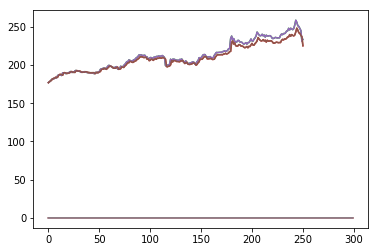

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [32]:
X_test[0]

array([[ 0.46959459],
       [ 0.46577002],
       [ 0.46800102],
       [ 0.46169046],
       [ 0.46717236],
       [ 0.46755482],
       [ 0.47176186]])

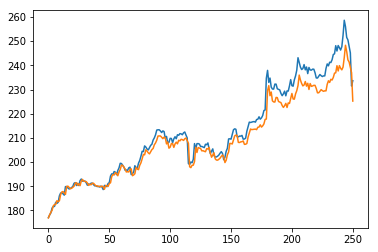

In [33]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.show()

In [34]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[ 236.95448303]], actual:[[ 231.44]]


In [35]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

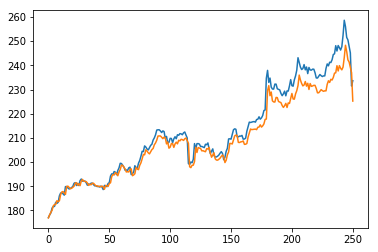

In [36]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.show()

In [ ]:
#raw dataset

In [85]:
import pandas as pd
data = pd.read_csv('pulsar_stars.csv')
print(data.columns)

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


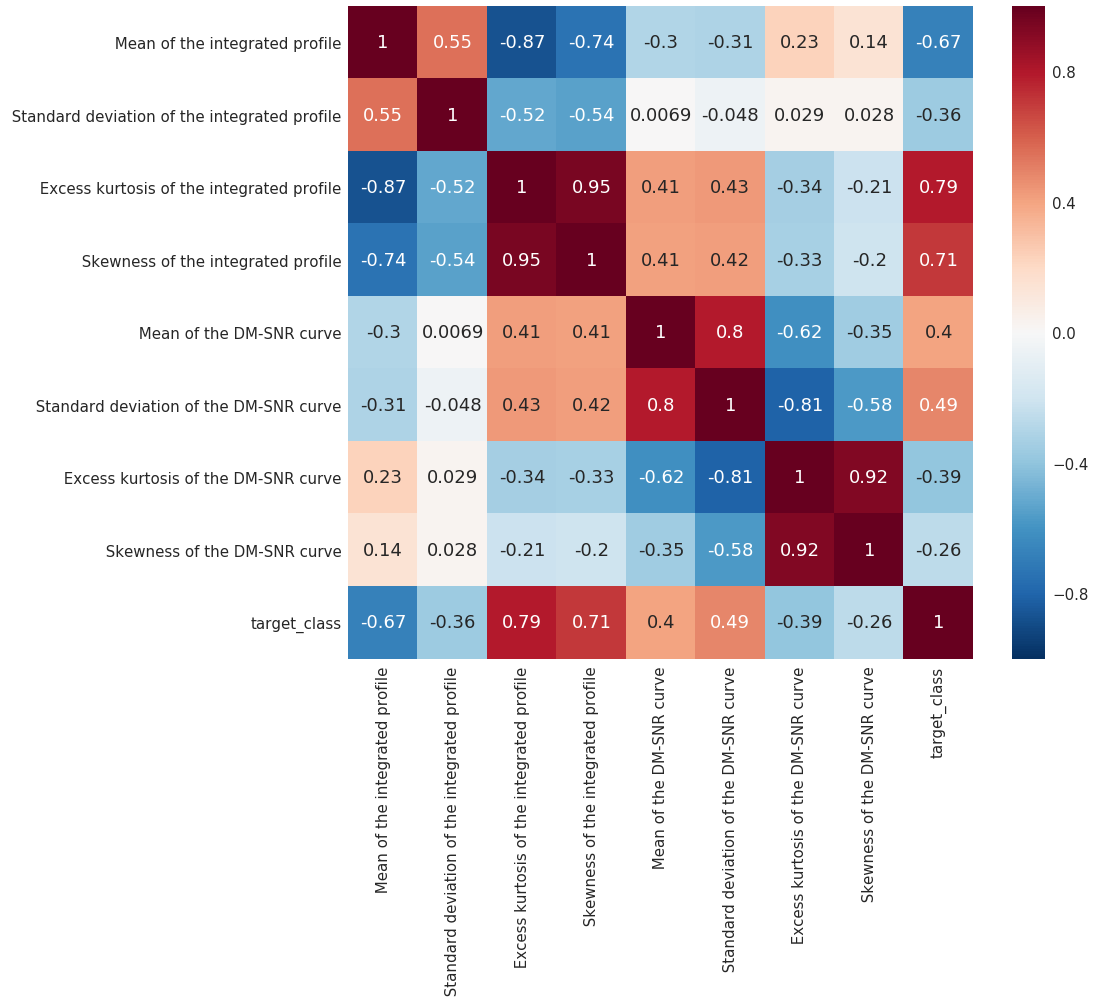

In [86]:
correlation = data.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [87]:
df = data[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class']]
df0 = data.target_class.values.tolist()
print(len(df0))
i = 0
ok = 0
ko = 0
while i < len(df0):
    if df0[i] == 0:
        ok = ok+1
    else:
        ko = ko+1
    i += 1

print(ok/(ko+ok))
print(ko/(ko+ok))
        

17898
0.908425522404738
0.09157447759526204


In [88]:
print(data.columns)

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


In [89]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["non_pulsar", "pulsar"]

In [90]:
print(data.shape)
print(data.isnull().values.any())

(17898, 9)
False


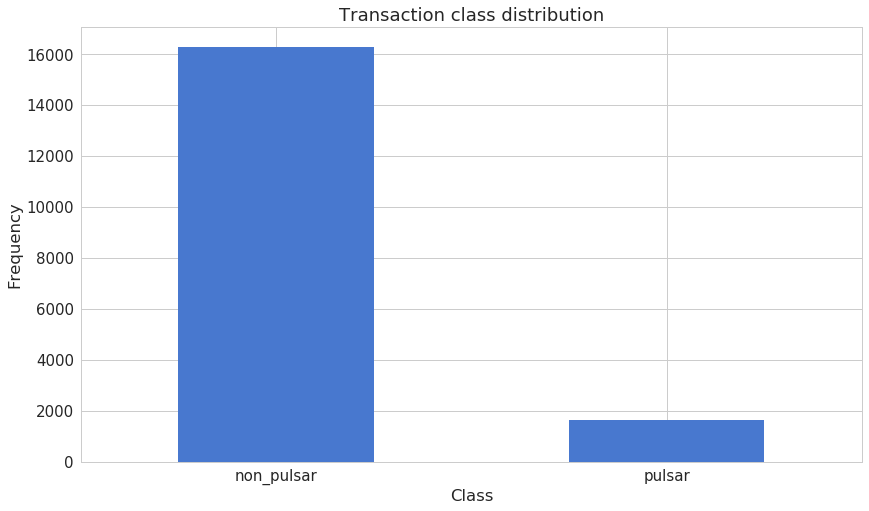

In [91]:
count_classes = pd.value_counts(data['target_class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [92]:
pulsar = data[data.target_class == 1]
non_pulsar = data[data.target_class == 0]

print(pulsar.shape)
print(non_pulsar.shape)
print('====================')
print('non pulsar')
print('====================')
print(non_pulsar.describe())
print('====================')
print('pulsar')
print('====================')
print(pulsar.describe())

(1639, 9)
(16259, 9)
non pulsar
        Mean of the integrated profile  \
count                     16259.000000   
mean                        116.562726   
std                          17.475932   
min                          17.210938   
25%                         105.253906   
50%                         117.257812   
75%                         128.285156   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                   16259.000000   
mean                                       47.339741   
std                                         6.182929   
min                                        28.698714   
25%                                        43.384645   
50%                                        47.485647   
75%                                        51.315620   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                          

In [93]:
from sklearn.preprocessing import StandardScaler

X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.target_class == 0]
X_train = X_train.drop(['target_class'], axis=1)

y_test = X_test['target_class']
X_test = X_test.drop(['target_class'], axis=1)

X_train = X_train.values
X_test = X_test.values
print(X_train[0])
print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[0])

[  1.08765625e+02   4.75204700e+01   1.91285119e-01   7.94546100e-03
   2.92140468e+00   1.80095806e+01   8.46825752e+00   8.41371114e+01]
(13000, 8)
(3580, 8)
[-0.447012    0.03095304 -0.05752827 -0.36626491 -0.24201311 -0.31251915
 -0.0990785  -0.28040627]


In [94]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [95]:
nb_epoch = 1000
batch_size = 320

autoencoder.compile(optimizer='sgd', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 13000 samples, validate on 3580 samples
Epoch 1/1000
13000/13000 [==============================] - 3s 232us/step - loss: 1.1840 - acc: 0.1488 - val_loss: 7.4362 - val_acc: 0.1765
Epoch 2/1000
13000/13000 [==============================] - 0s 16us/step - loss: 1.0969 - acc: 0.2434 - val_loss: 7.3026 - val_acc: 0.3098
Epoch 3/1000
13000/13000 [==============================] - 0s 18us/step - loss: 1.0577 - acc: 0.3233 - val_loss: 7.2340 - val_acc: 0.3813
Epoch 4/1000
13000/13000 [==============================] - 0s 13us/step - loss: 1.0354 - acc: 0.3579 - val_loss: 7.1926 - val_acc: 0.4020
Epoch 5/1000
13000/13000 [==============================] - 0s 21us/step - loss: 1.0190 - acc: 0.3884 - val_loss: 7.1608 - val_acc: 0.4218
Epoch 6/1000
13000/13000 [==============================] - 0s 16us/step - loss: 1.0057 - acc: 0.3966 - val_loss: 7.1330 - val_acc: 0.4274
Epoch 7/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.9944 - acc: 0.4033 - val_loss: 7.

13000/13000 [==============================] - 0s 16us/step - loss: 0.5028 - acc: 0.7503 - val_loss: 5.3955 - val_acc: 0.7640
Epoch 117/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.5017 - acc: 0.7502 - val_loss: 5.3892 - val_acc: 0.7651
Epoch 118/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.5007 - acc: 0.7518 - val_loss: 5.3834 - val_acc: 0.7654
Epoch 119/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.4997 - acc: 0.7529 - val_loss: 5.3765 - val_acc: 0.7673
Epoch 120/1000
13000/13000 [==============================] - 0s 23us/step - loss: 0.4987 - acc: 0.7542 - val_loss: 5.3709 - val_acc: 0.7679
Epoch 121/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.4977 - acc: 0.7545 - val_loss: 5.3647 - val_acc: 0.7690
Epoch 122/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.4968 - acc: 0.7560 - val_loss: 5.3582 - val_acc: 0.7701
Epoch 123/1000
13000/13000 [

13000/13000 [==============================] - 0s 17us/step - loss: 0.4386 - acc: 0.7969 - val_loss: 4.8590 - val_acc: 0.8050
Epoch 233/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.4383 - acc: 0.7970 - val_loss: 4.8560 - val_acc: 0.8059
Epoch 234/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.4380 - acc: 0.7969 - val_loss: 4.8529 - val_acc: 0.8047
Epoch 235/1000
13000/13000 [==============================] - 0s 21us/step - loss: 0.4377 - acc: 0.7972 - val_loss: 4.8493 - val_acc: 0.8064
Epoch 236/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.4374 - acc: 0.7969 - val_loss: 4.8469 - val_acc: 0.8070
Epoch 237/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.4371 - acc: 0.7975 - val_loss: 4.8435 - val_acc: 0.8053
Epoch 238/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.4368 - acc: 0.7978 - val_loss: 4.8402 - val_acc: 0.8070
Epoch 239/1000
13000/13000 [

13000/13000 [==============================] - 0s 12us/step - loss: 0.4126 - acc: 0.8029 - val_loss: 4.5372 - val_acc: 0.8101
Epoch 349/1000
13000/13000 [==============================] - 0s 21us/step - loss: 0.4125 - acc: 0.8019 - val_loss: 4.5357 - val_acc: 0.8103
Epoch 350/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.4123 - acc: 0.8028 - val_loss: 4.5316 - val_acc: 0.8112
Epoch 351/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.4121 - acc: 0.8027 - val_loss: 4.5323 - val_acc: 0.8106
Epoch 352/1000
13000/13000 [==============================] - 0s 23us/step - loss: 0.4120 - acc: 0.8021 - val_loss: 4.5291 - val_acc: 0.8101
Epoch 353/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.4118 - acc: 0.8025 - val_loss: 4.5275 - val_acc: 0.8117
Epoch 354/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.4116 - acc: 0.8018 - val_loss: 4.5258 - val_acc: 0.8117
Epoch 355/1000
13000/13000 [

13000/13000 [==============================] - 0s 17us/step - loss: 0.3979 - acc: 0.8053 - val_loss: 4.3011 - val_acc: 0.8218
Epoch 464/1000
13000/13000 [==============================] - 0s 24us/step - loss: 0.3978 - acc: 0.8063 - val_loss: 4.3005 - val_acc: 0.8196
Epoch 465/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.3977 - acc: 0.8058 - val_loss: 4.2950 - val_acc: 0.8187
Epoch 466/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.3976 - acc: 0.8052 - val_loss: 4.2956 - val_acc: 0.8207
Epoch 467/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.3975 - acc: 0.8054 - val_loss: 4.2949 - val_acc: 0.8182
Epoch 468/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.3974 - acc: 0.8058 - val_loss: 4.2923 - val_acc: 0.8198
Epoch 469/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3973 - acc: 0.8065 - val_loss: 4.2927 - val_acc: 0.8201
Epoch 470/1000
13000/13000 [

Epoch 521/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3926 - acc: 0.8072 - val_loss: 4.2018 - val_acc: 0.8249
Epoch 522/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.3925 - acc: 0.8071 - val_loss: 4.2010 - val_acc: 0.8243
Epoch 523/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.3925 - acc: 0.8067 - val_loss: 4.1949 - val_acc: 0.8198
Epoch 524/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3924 - acc: 0.8065 - val_loss: 4.1951 - val_acc: 0.8246
Epoch 525/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.3923 - acc: 0.8071 - val_loss: 4.1974 - val_acc: 0.8277
Epoch 526/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3922 - acc: 0.8066 - val_loss: 4.1949 - val_acc: 0.8232
Epoch 527/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3921 - acc: 0.8080 - val_loss: 4.1913 - val_acc: 0.8226
Epoch 528/100

13000/13000 [==============================] - 0s 15us/step - loss: 0.3882 - acc: 0.8087 - val_loss: 4.1107 - val_acc: 0.8260
Epoch 580/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.3881 - acc: 0.8084 - val_loss: 4.1110 - val_acc: 0.8243
Epoch 581/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.3880 - acc: 0.8095 - val_loss: 4.1076 - val_acc: 0.8254
Epoch 582/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.3879 - acc: 0.8105 - val_loss: 4.1096 - val_acc: 0.8246
Epoch 583/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3878 - acc: 0.8090 - val_loss: 4.1024 - val_acc: 0.8218
Epoch 584/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.3878 - acc: 0.8092 - val_loss: 4.1040 - val_acc: 0.8285
Epoch 585/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.3877 - acc: 0.8092 - val_loss: 4.1000 - val_acc: 0.8263
Epoch 586/1000
13000/13000 [

Epoch 695/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.3810 - acc: 0.8136 - val_loss: 3.9497 - val_acc: 0.8330
Epoch 696/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.3810 - acc: 0.8132 - val_loss: 3.9486 - val_acc: 0.8296
Epoch 697/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.3809 - acc: 0.8135 - val_loss: 3.9449 - val_acc: 0.8372
Epoch 698/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3808 - acc: 0.8147 - val_loss: 3.9446 - val_acc: 0.8374
Epoch 699/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.3807 - acc: 0.8139 - val_loss: 3.9447 - val_acc: 0.8380
Epoch 700/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.3809 - acc: 0.8155 - val_loss: 3.9383 - val_acc: 0.8279
Epoch 701/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.3807 - acc: 0.8128 - val_loss: 3.9430 - val_acc: 0.8380
Epoch 702/100

13000/13000 [==============================] - 0s 13us/step - loss: 0.3779 - acc: 0.8180 - val_loss: 3.8778 - val_acc: 0.8349
Epoch 754/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3780 - acc: 0.8165 - val_loss: 3.8744 - val_acc: 0.8349
Epoch 755/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.3782 - acc: 0.8174 - val_loss: 3.8774 - val_acc: 0.8344
Epoch 756/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.3779 - acc: 0.8179 - val_loss: 3.8745 - val_acc: 0.8313
Epoch 757/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.3780 - acc: 0.8159 - val_loss: 3.8710 - val_acc: 0.8355
Epoch 758/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.3777 - acc: 0.8169 - val_loss: 3.8679 - val_acc: 0.8304
Epoch 759/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.3778 - acc: 0.8171 - val_loss: 3.8694 - val_acc: 0.8316
Epoch 760/1000
13000/13000 [

13000/13000 [==============================] - 0s 16us/step - loss: 0.3731 - acc: 0.8228 - val_loss: 3.7532 - val_acc: 0.8394
Epoch 870/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.3731 - acc: 0.8225 - val_loss: 3.7524 - val_acc: 0.8402
Epoch 871/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.3735 - acc: 0.8208 - val_loss: 3.7486 - val_acc: 0.8366
Epoch 872/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.3744 - acc: 0.8206 - val_loss: 3.7521 - val_acc: 0.8391
Epoch 873/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.3739 - acc: 0.8185 - val_loss: 3.7555 - val_acc: 0.8363
Epoch 874/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.3736 - acc: 0.8203 - val_loss: 3.7438 - val_acc: 0.8327
Epoch 875/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.3751 - acc: 0.8185 - val_loss: 3.7466 - val_acc: 0.8380
Epoch 876/1000
13000/13000 [

Epoch 927/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.3730 - acc: 0.8225 - val_loss: 3.7042 - val_acc: 0.8240
Epoch 928/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.3735 - acc: 0.8228 - val_loss: 3.7043 - val_acc: 0.8402
Epoch 929/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.3710 - acc: 0.8248 - val_loss: 3.6978 - val_acc: 0.8399
Epoch 930/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.3734 - acc: 0.8205 - val_loss: 3.6953 - val_acc: 0.8447
Epoch 931/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.3726 - acc: 0.8206 - val_loss: 3.6972 - val_acc: 0.8338
Epoch 932/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.3734 - acc: 0.8230 - val_loss: 3.6989 - val_acc: 0.8380
Epoch 933/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.3712 - acc: 0.8231 - val_loss: 3.6951 - val_acc: 0.8433
Epoch 934/100

In [96]:
autoencoder = load_model('model.h5')

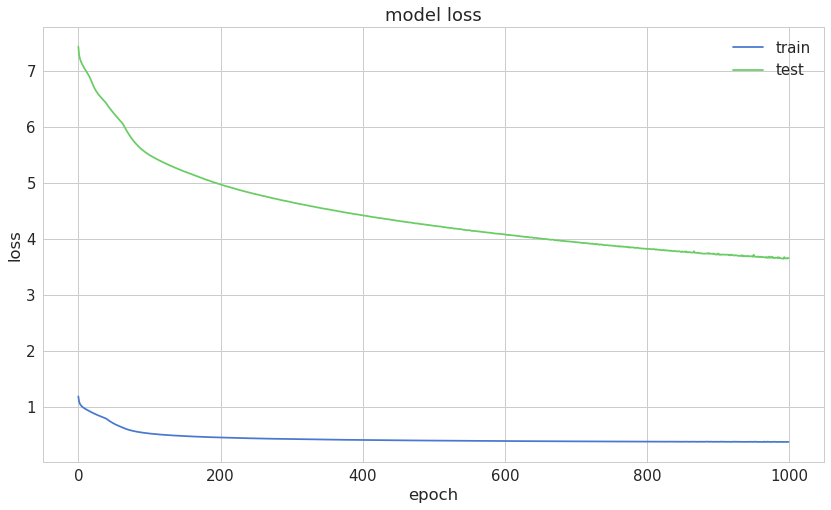

In [97]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [98]:
predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,3580.000000,3580.000000
mean,3.621604,0.089665
std,21.085495,0.285741
min,0.021686,0.000000
25%,0.136375,0.000000
50%,0.242454,0.000000
75%,0.530357,0.000000
max,423.157097,1.000000


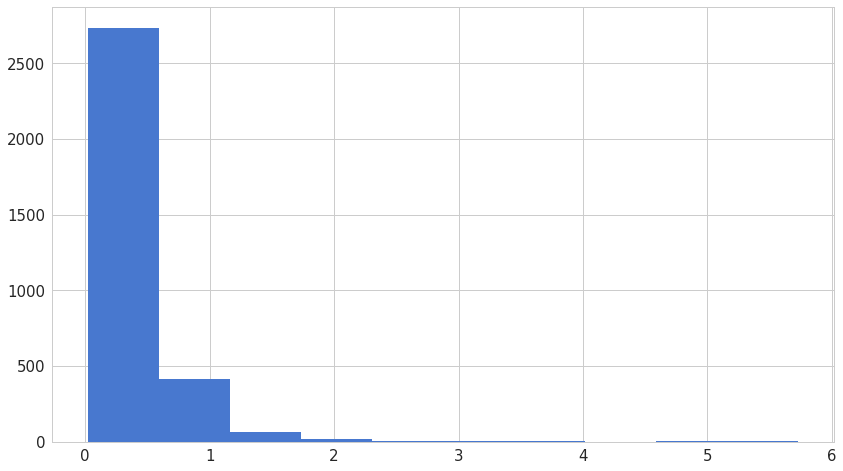

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)


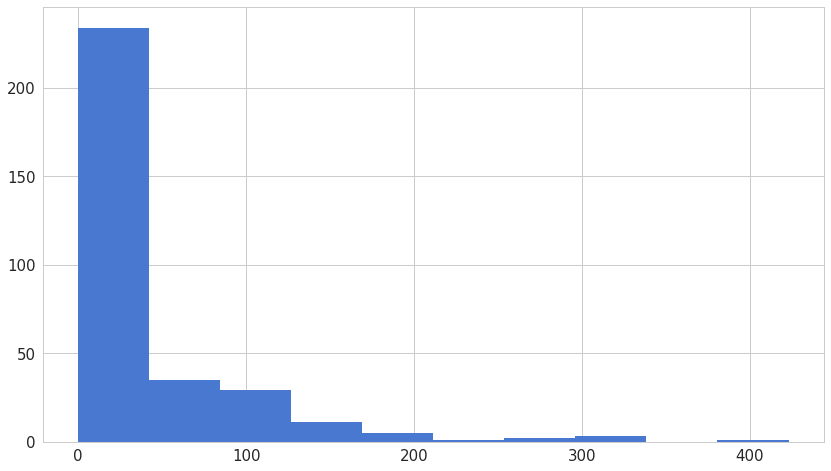

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [101]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

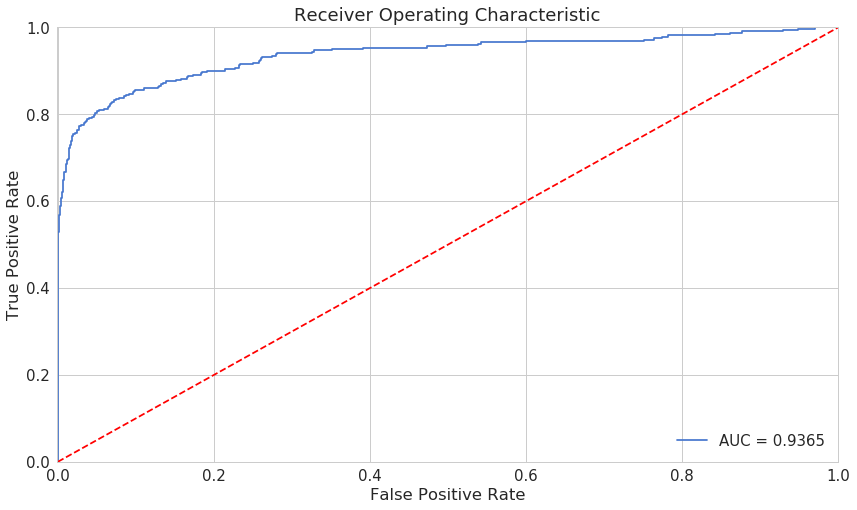

In [102]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

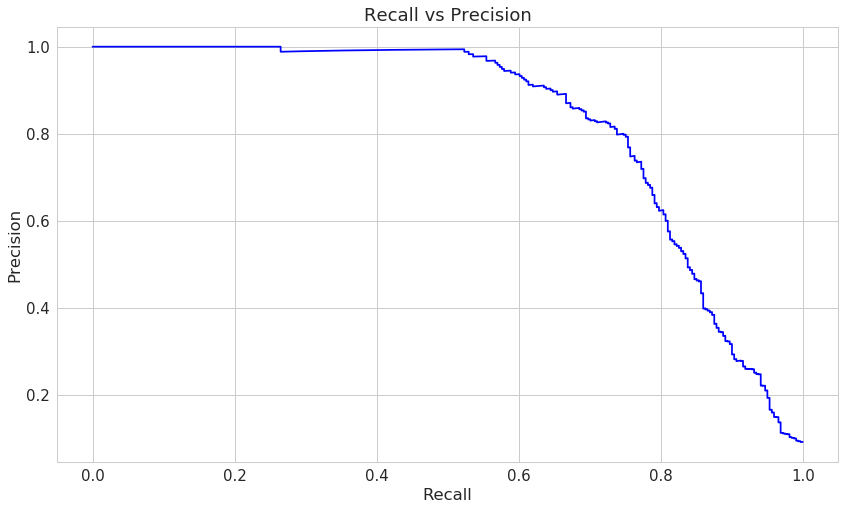

In [103]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

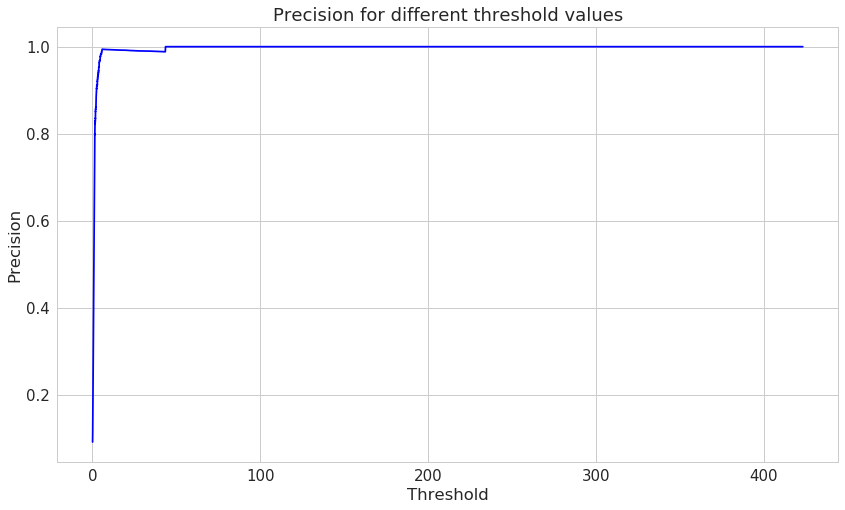

In [104]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

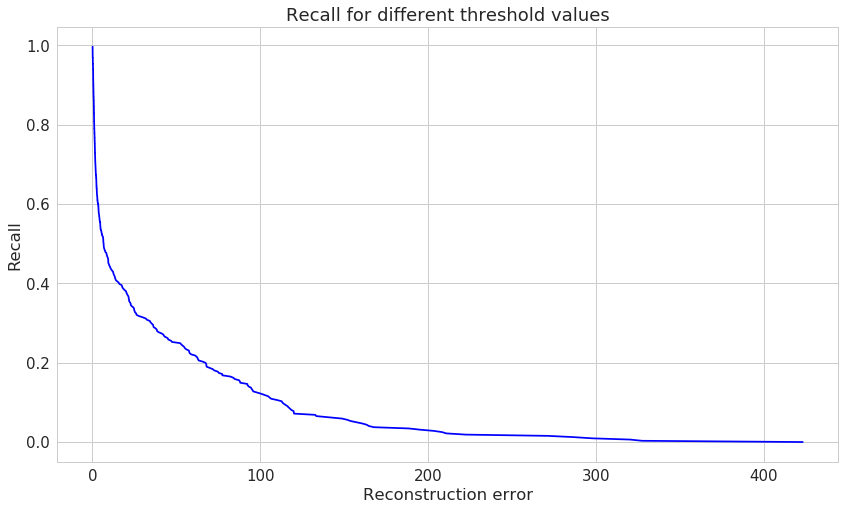

In [105]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [106]:
threshold = 1.3

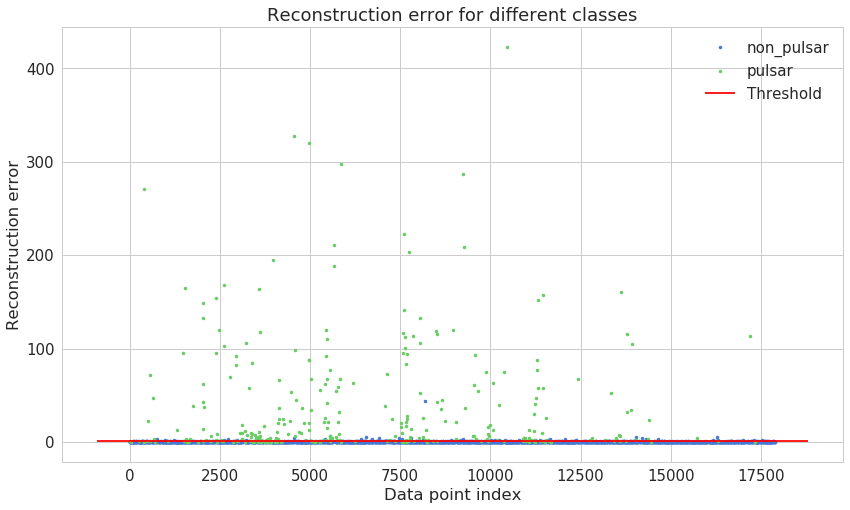

In [107]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "pulsar" if name == 1 else "non_pulsar")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

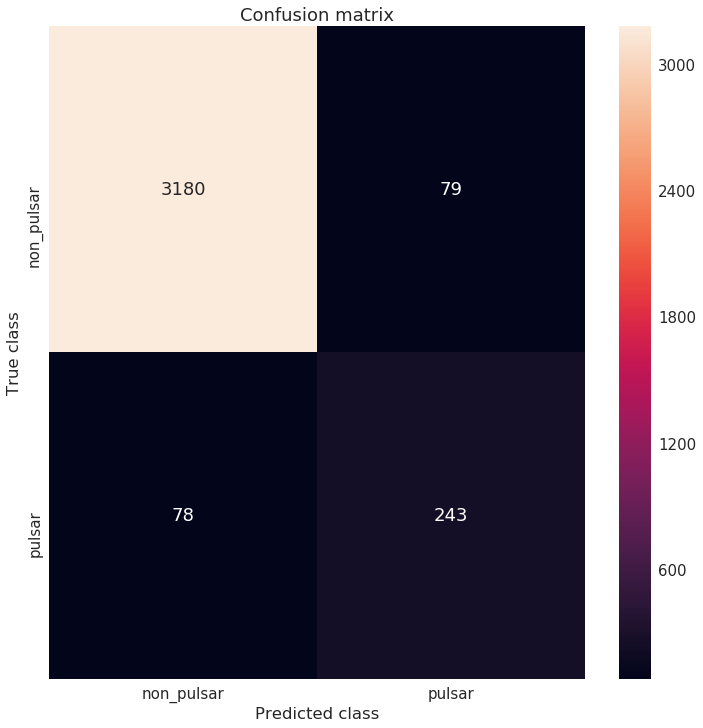

In [108]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### filtered dataset

In [135]:
data = pd.read_csv('pulsar_stars.csv')
df = data[[' Mean of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       'target_class']]

In [136]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["non_pulsar", "pulsar"]

In [137]:
print(df.shape)
print(df.isnull().values.any())

(17898, 6)
False


In [138]:
from sklearn.preprocessing import StandardScaler

X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.target_class == 0]
X_train = X_train.drop(['target_class'], axis=1)

y_test = X_test['target_class']
X_test = X_test.drop(['target_class'], axis=1)

X_train = X_train.values
X_test = X_test.values
print(X_train[0])
print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[0])

[  1.08765625e+02   1.91285119e-01   7.94546100e-03   2.92140468e+00
   1.80095806e+01]
(13000, 5)
(3580, 5)
[-0.447012   -0.05752827 -0.36626491 -0.24201311 -0.31251915]


In [139]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [140]:
nb_epoch = 1000
batch_size = 320

autoencoder.compile(optimizer='sgd', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 13000 samples, validate on 3580 samples
Epoch 1/1000
13000/13000 [==============================] - 0s 35us/step - loss: 1.1019 - acc: 0.1605 - val_loss: 11.0138 - val_acc: 0.2874
Epoch 2/1000
13000/13000 [==============================] - 0s 20us/step - loss: 1.0394 - acc: 0.4092 - val_loss: 10.8726 - val_acc: 0.4760
Epoch 3/1000
13000/13000 [==============================] - 0s 19us/step - loss: 1.0047 - acc: 0.5515 - val_loss: 10.7710 - val_acc: 0.5411
Epoch 4/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.9813 - acc: 0.6011 - val_loss: 10.7025 - val_acc: 0.5696
Epoch 5/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.9637 - acc: 0.6204 - val_loss: 10.6531 - val_acc: 0.5804
Epoch 6/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.9498 - acc: 0.6305 - val_loss: 10.6182 - val_acc: 0.5888
Epoch 7/1000
13000/13000 [==============================] - 0s 22us/step - loss: 0.9381 - acc: 0.6397 - val_los

13000/13000 [==============================] - 0s 18us/step - loss: 0.6624 - acc: 0.7032 - val_loss: 9.7680 - val_acc: 0.6534
Epoch 117/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6619 - acc: 0.7035 - val_loss: 9.7643 - val_acc: 0.6534
Epoch 118/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.6613 - acc: 0.7038 - val_loss: 9.7600 - val_acc: 0.6531
Epoch 119/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6608 - acc: 0.7038 - val_loss: 9.7566 - val_acc: 0.6534
Epoch 120/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.6603 - acc: 0.7040 - val_loss: 9.7534 - val_acc: 0.6528
Epoch 121/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6598 - acc: 0.7040 - val_loss: 9.7503 - val_acc: 0.6534
Epoch 122/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6593 - acc: 0.7044 - val_loss: 9.7468 - val_acc: 0.6531
Epoch 123/1000
13000/13000 [

13000/13000 [==============================] - 0s 15us/step - loss: 0.6317 - acc: 0.7073 - val_loss: 9.5134 - val_acc: 0.6567
Epoch 233/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6316 - acc: 0.7071 - val_loss: 9.5127 - val_acc: 0.6567
Epoch 234/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.6315 - acc: 0.7070 - val_loss: 9.5103 - val_acc: 0.6567
Epoch 235/1000
13000/13000 [==============================] - ETA: 0s - loss: 0.6441 - acc: 0.704 - 0s 15us/step - loss: 0.6314 - acc: 0.7068 - val_loss: 9.5102 - val_acc: 0.6564
Epoch 236/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.6313 - acc: 0.7070 - val_loss: 9.5092 - val_acc: 0.6570
Epoch 237/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.6312 - acc: 0.7070 - val_loss: 9.5084 - val_acc: 0.6564
Epoch 238/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.6311 - acc: 0.7070 - val_loss: 9.5067 - val_ac

Epoch 290/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.6268 - acc: 0.7055 - val_loss: 9.4485 - val_acc: 0.6559
Epoch 291/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6268 - acc: 0.7057 - val_loss: 9.4468 - val_acc: 0.6553
Epoch 292/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6267 - acc: 0.7055 - val_loss: 9.4480 - val_acc: 0.6561
Epoch 293/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.6266 - acc: 0.7064 - val_loss: 9.4452 - val_acc: 0.6556
Epoch 294/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.6266 - acc: 0.7052 - val_loss: 9.4468 - val_acc: 0.6561
Epoch 295/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.6265 - acc: 0.7061 - val_loss: 9.4396 - val_acc: 0.6545
Epoch 296/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.6264 - acc: 0.7057 - val_loss: 9.4429 - val_acc: 0.6545
Epoch 297/100

13000/13000 [==============================] - 0s 19us/step - loss: 0.6236 - acc: 0.7061 - val_loss: 9.3922 - val_acc: 0.6553
Epoch 349/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6236 - acc: 0.7057 - val_loss: 9.3950 - val_acc: 0.6550
Epoch 350/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.6235 - acc: 0.7058 - val_loss: 9.3919 - val_acc: 0.6553
Epoch 351/1000
13000/13000 [==============================] - ETA: 0s - loss: 0.6258 - acc: 0.707 - 0s 10us/step - loss: 0.6235 - acc: 0.7056 - val_loss: 9.3939 - val_acc: 0.6559
Epoch 352/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6234 - acc: 0.7058 - val_loss: 9.3931 - val_acc: 0.6547
Epoch 353/1000
13000/13000 [==============================] - 0s 23us/step - loss: 0.6234 - acc: 0.7056 - val_loss: 9.3882 - val_acc: 0.6553
Epoch 354/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.6234 - acc: 0.7055 - val_loss: 9.3892 - val_ac

Epoch 406/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.6213 - acc: 0.7056 - val_loss: 9.3500 - val_acc: 0.6559
Epoch 407/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.6213 - acc: 0.7053 - val_loss: 9.3435 - val_acc: 0.6539
Epoch 408/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.6212 - acc: 0.7055 - val_loss: 9.3436 - val_acc: 0.6545
Epoch 409/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.6212 - acc: 0.7054 - val_loss: 9.3456 - val_acc: 0.6542
Epoch 410/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6212 - acc: 0.7050 - val_loss: 9.3389 - val_acc: 0.6542
Epoch 411/1000
13000/13000 [==============================] - 0s 22us/step - loss: 0.6211 - acc: 0.7054 - val_loss: 9.3370 - val_acc: 0.6534
Epoch 412/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6211 - acc: 0.7048 - val_loss: 9.3447 - val_acc: 0.6556
Epoch 413/100

13000/13000 [==============================] - 0s 20us/step - loss: 0.6195 - acc: 0.7048 - val_loss: 9.3035 - val_acc: 0.6539
Epoch 465/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6195 - acc: 0.7051 - val_loss: 9.3091 - val_acc: 0.6553
Epoch 466/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6195 - acc: 0.7051 - val_loss: 9.3058 - val_acc: 0.6545
Epoch 467/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6195 - acc: 0.7052 - val_loss: 9.3059 - val_acc: 0.6553
Epoch 468/1000
13000/13000 [==============================] - 0s 21us/step - loss: 0.6194 - acc: 0.7048 - val_loss: 9.3057 - val_acc: 0.6536
Epoch 469/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.6194 - acc: 0.7052 - val_loss: 9.3056 - val_acc: 0.6547
Epoch 470/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6194 - acc: 0.7050 - val_loss: 9.2926 - val_acc: 0.6528
Epoch 471/1000
13000/13000 [

Epoch 580/1000
13000/13000 [==============================] - 0s 15us/step - loss: 0.6170 - acc: 0.7045 - val_loss: 9.2405 - val_acc: 0.6528
Epoch 581/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6170 - acc: 0.7037 - val_loss: 9.2457 - val_acc: 0.6550
Epoch 582/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6170 - acc: 0.7041 - val_loss: 9.2434 - val_acc: 0.6539
Epoch 583/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.6169 - acc: 0.7043 - val_loss: 9.2446 - val_acc: 0.6539
Epoch 584/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6169 - acc: 0.7042 - val_loss: 9.2414 - val_acc: 0.6536
Epoch 585/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6169 - acc: 0.7045 - val_loss: 9.2436 - val_acc: 0.6539
Epoch 586/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6169 - acc: 0.7044 - val_loss: 9.2453 - val_acc: 0.6545
Epoch 587/100

Epoch 638/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6160 - acc: 0.7031 - val_loss: 9.2148 - val_acc: 0.6536
Epoch 639/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.6160 - acc: 0.7041 - val_loss: 9.2155 - val_acc: 0.6528
Epoch 640/1000
13000/13000 [==============================] - 0s 22us/step - loss: 0.6159 - acc: 0.7036 - val_loss: 9.2209 - val_acc: 0.6545
Epoch 641/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.6159 - acc: 0.7039 - val_loss: 9.2173 - val_acc: 0.6528
Epoch 642/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6159 - acc: 0.7035 - val_loss: 9.2179 - val_acc: 0.6536
Epoch 643/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6160 - acc: 0.7035 - val_loss: 9.2178 - val_acc: 0.6534
Epoch 644/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.6159 - acc: 0.7035 - val_loss: 9.2221 - val_acc: 0.6539
Epoch 645/100

13000/13000 [==============================] - 0s 13us/step - loss: 0.6143 - acc: 0.7047 - val_loss: 9.1755 - val_acc: 0.6542
Epoch 755/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6144 - acc: 0.7040 - val_loss: 9.1749 - val_acc: 0.6545
Epoch 756/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6144 - acc: 0.7042 - val_loss: 9.1725 - val_acc: 0.6547
Epoch 757/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6143 - acc: 0.7040 - val_loss: 9.1781 - val_acc: 0.6539
Epoch 758/1000
13000/13000 [==============================] - 0s 17us/step - loss: 0.6143 - acc: 0.7035 - val_loss: 9.1798 - val_acc: 0.6539
Epoch 759/1000
13000/13000 [==============================] - 0s 23us/step - loss: 0.6143 - acc: 0.7041 - val_loss: 9.1553 - val_acc: 0.6503
Epoch 760/1000
13000/13000 [==============================] - 0s 14us/step - loss: 0.6143 - acc: 0.7033 - val_loss: 9.1706 - val_acc: 0.6545
Epoch 761/1000
13000/13000 [

Epoch 870/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6137 - acc: 0.7031 - val_loss: 9.1335 - val_acc: 0.6539
Epoch 871/1000
13000/13000 [==============================] - 0s 16us/step - loss: 0.6137 - acc: 0.7028 - val_loss: 9.1347 - val_acc: 0.6539
Epoch 872/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6136 - acc: 0.7032 - val_loss: 9.1385 - val_acc: 0.6542
Epoch 873/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.6132 - acc: 0.7038 - val_loss: 9.1284 - val_acc: 0.6539
Epoch 874/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6132 - acc: 0.7042 - val_loss: 9.1330 - val_acc: 0.6528
Epoch 875/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6132 - acc: 0.7038 - val_loss: 9.1392 - val_acc: 0.6531
Epoch 876/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.6131 - acc: 0.7035 - val_loss: 9.1459 - val_acc: 0.6508
Epoch 877/100

13000/13000 [==============================] - 0s 13us/step - loss: 0.6129 - acc: 0.7032 - val_loss: 9.1201 - val_acc: 0.6542
Epoch 929/1000
13000/13000 [==============================] - 0s 19us/step - loss: 0.6133 - acc: 0.7027 - val_loss: 9.1424 - val_acc: 0.6514
Epoch 930/1000
13000/13000 [==============================] - 0s 18us/step - loss: 0.6143 - acc: 0.7029 - val_loss: 9.1079 - val_acc: 0.6528
Epoch 931/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.6133 - acc: 0.7021 - val_loss: 9.1366 - val_acc: 0.6528
Epoch 932/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6136 - acc: 0.7027 - val_loss: 9.1330 - val_acc: 0.6531
Epoch 933/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.6131 - acc: 0.7027 - val_loss: 9.1194 - val_acc: 0.6545
Epoch 934/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.6130 - acc: 0.7023 - val_loss: 9.1159 - val_acc: 0.6542
Epoch 935/1000
13000/13000 [

In [141]:
autoencoder = load_model('model.h5')

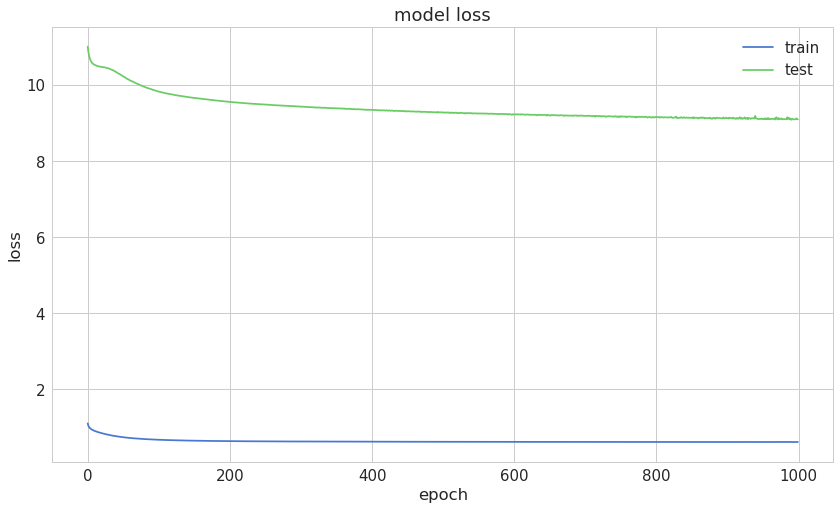

In [142]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [143]:
predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,3580.000000,3580.000000
mean,9.082911,0.089665
std,48.494928,0.285741
min,0.009815,0.000000
25%,0.145290,0.000000
50%,0.273848,0.000000
75%,0.700325,0.000000
max,860.650571,1.000000


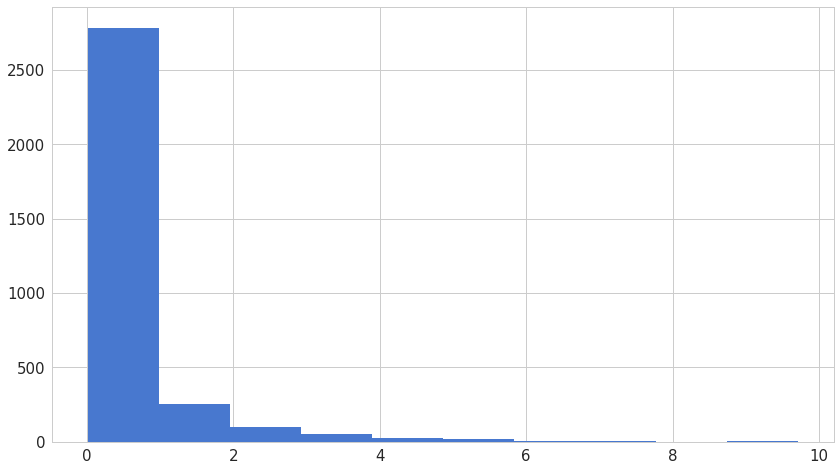

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)


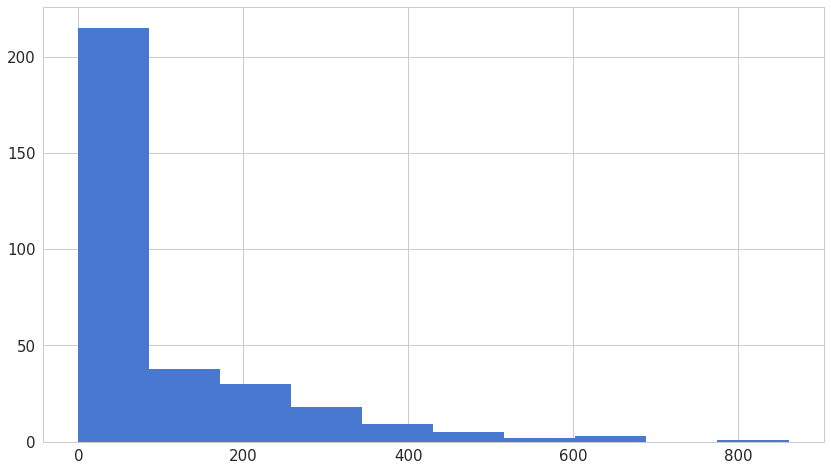

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [146]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

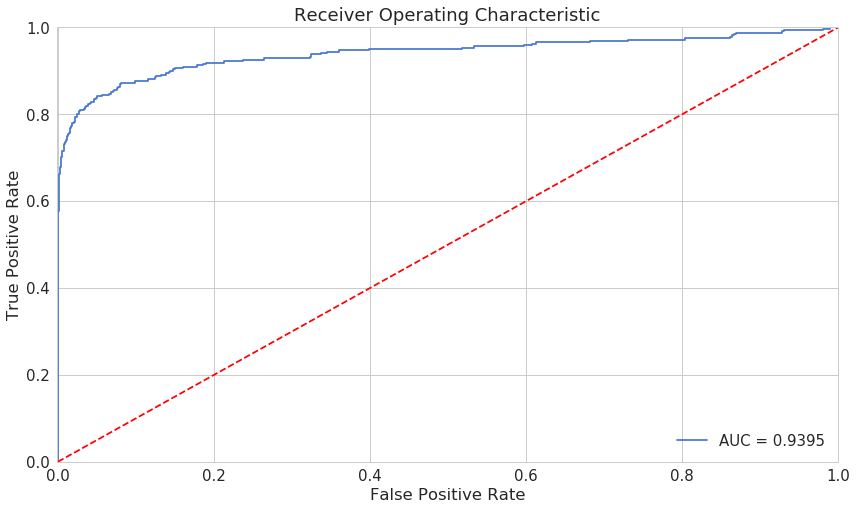

In [147]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

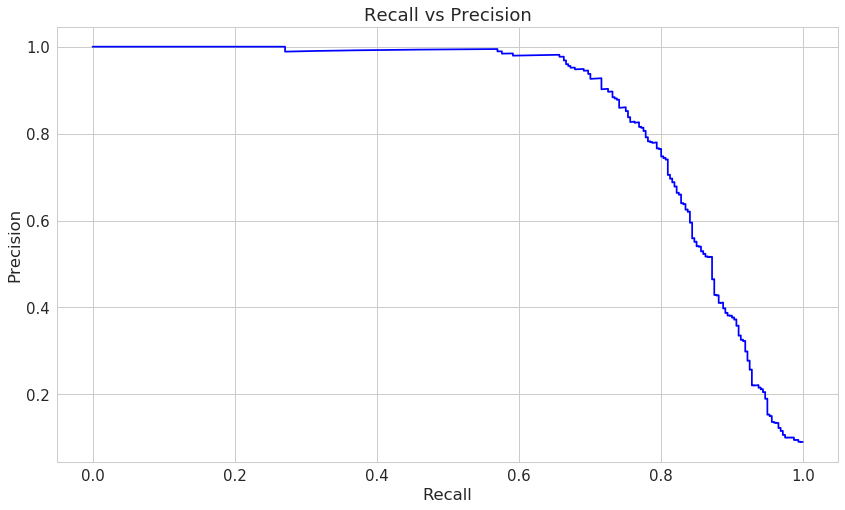

In [148]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

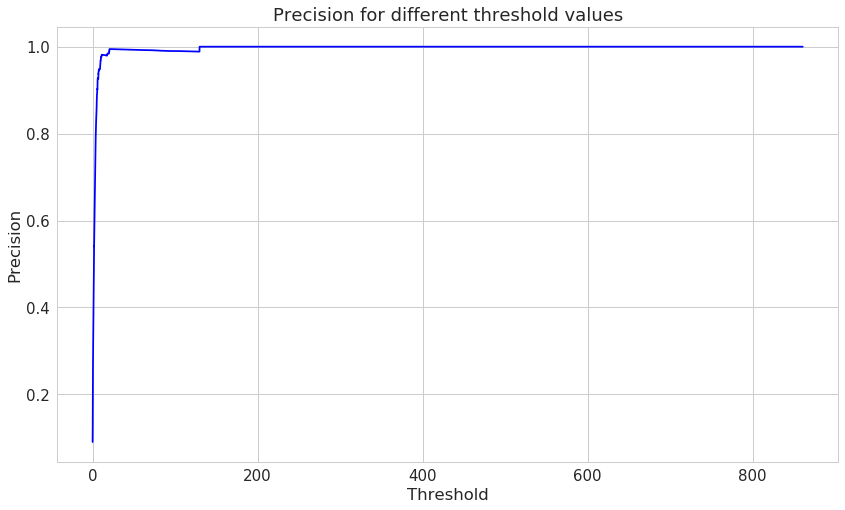

In [149]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

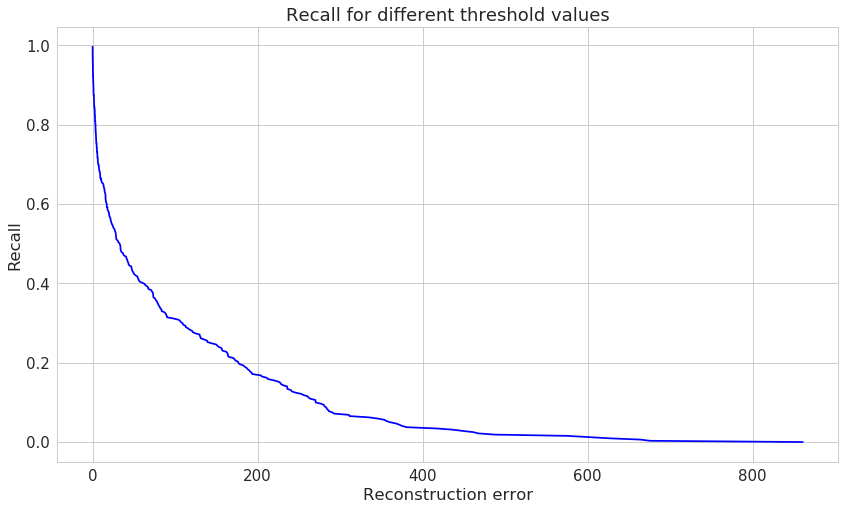

In [150]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [166]:
threshold = 1.3

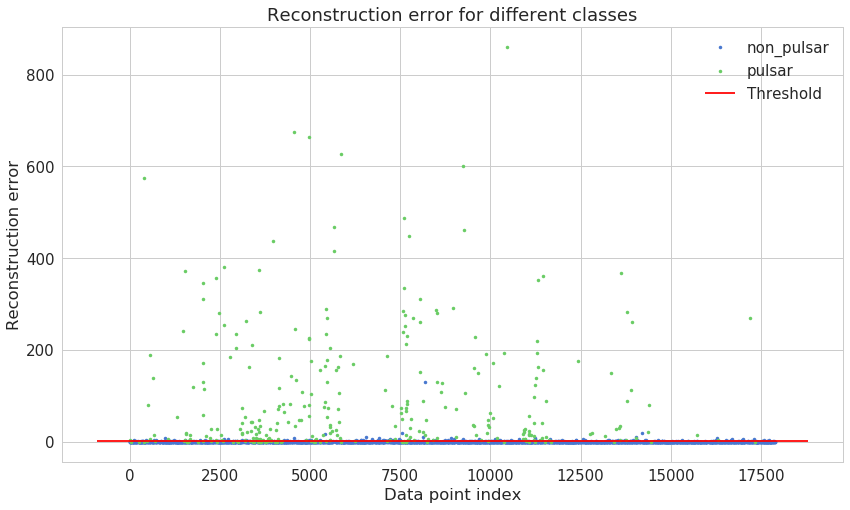

In [167]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "pulsar" if name == 1 else "non_pulsar")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

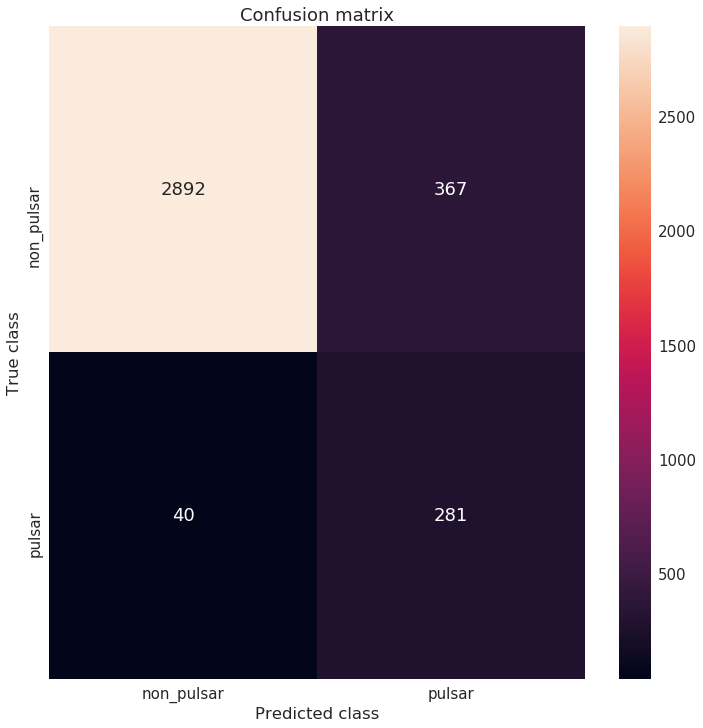

In [168]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
#PCA dataset

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')
17898
16259
1639
Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')
(17898, 9)
False
(1639, 9)
(16259, 9)
non pulsar
        Mean of the integrated profile  \
count                     16259.000000   
mean                        116.562726   
std 

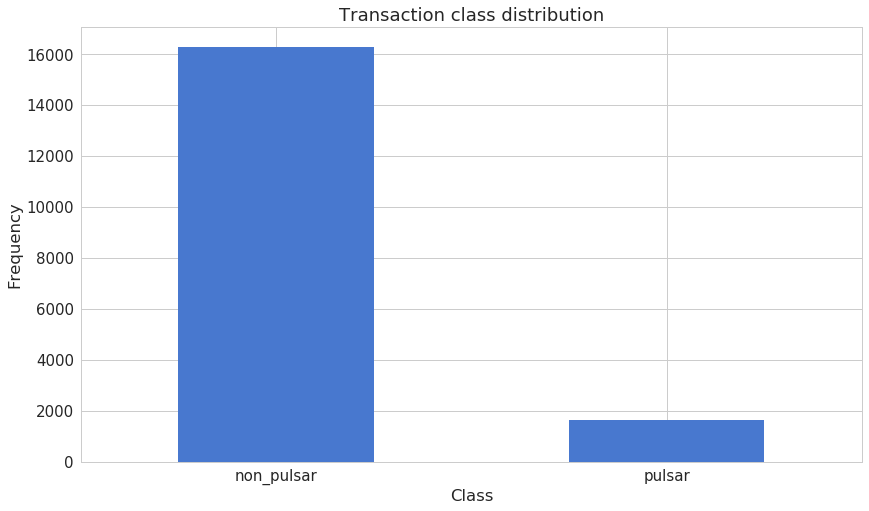

In [183]:
try:

    import pandas as pd    

except ImportError:

    print("Cannot find the library pandas")

try:

    %matplotlib notebook

    import matplotlib.pyplot as plt

except ImportError:

    print("Cannot find the library matplotlib")

try:

    from sklearn import preprocessing, decomposition 

except ImportError:

    print("Cannot find the library sklearn")

try:

    import operator

except ImportError:

    print("Cannot find the library operator")

try:

    from sklearn.model_selection import train_test_split

except ImportError:

    print("Cannot find the library train test split")

try:

    from sklearn.preprocessing import StandardScaler

except ImportError:

    print("Cannot find the library StandardScaler")

try:

    import numpy as np

except ImportError:

    print("Cannot find the library numpy")   

try:

    from sklearn.neural_network import MLPRegressor

except ImportError:

    print("Cannot find the library MLPRegressor") 

try:

    from sklearn.metrics import accuracy_score

except ImportError:

    print("Cannot find the library accuracy_score") 

try:

    from sklearn import preprocessing, decomposition

except ImportError:

    print("Cannot find the library preprocessing, decomposition") 

try:

    from mpl_toolkits.mplot3d import Axes3D

except ImportError:

    print("Cannot find the library Axes3D") 

try:

    import seaborn as sns

except ImportError:

    print("Cannot find the library sns") 

try:

    from sklearn.decomposition import PCA

except ImportError:

    print("Cannot find the library PCA") 

try:

    import copy

except ImportError:

    print('cannot find the library copy')

try:

    from sklearn.metrics import confusion_matrix

except ImportError:

    print('cannot find the library confusion_matrix')

%matplotlib inline 

import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

from scipy import stats

import tensorflow as tf

import seaborn as sns

from pylab import rcParams

from sklearn.model_selection import train_test_split

from keras.models import Model, load_model

from keras.layers import Input, Dense

from keras.callbacks import ModelCheckpoint, TensorBoard

from keras import regularizers

 

 

def PCA_generator(df):

    i = 0

    j = 0

    size = len(df.columns)

    X = df.values

    X_std = StandardScaler().fit_transform(X)

# Clculating Eigenvectors and eigenvalues of Cov matirx

    mean_vec = np.mean(X_std, axis=0)

    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

    print('Covariance matrix \n%s' %cov_mat)

    cov_mat = np.cov(X_std.T)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    print('Eigenvectors \n%s' %eig_vecs)

    print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples

    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#  Sort the (eigenvalue, eigenvector) tuples from high to low

    eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

    print('Eigenvalues in descending order:')

    for i in eig_pairs:

        print(i[0])

    tot = sum(eig_vals)

    var_exp_sorted = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

    cum_var_exp_sorted = np.cumsum(var_exp_sorted)

    with plt.style.context('seaborn-whitegrid'):

        plt.figure(figsize=(size, 4))

        plt.bar(range(size), var_exp_sorted, alpha=0.5, align='center', label='individual explained variance')

        plt.step(range(size), cum_var_exp_sorted, where='mid', label='cumulative explained variance')

        plt.ylabel('Explained variance ratio')

        plt.xlabel('Principal components')

        plt.legend(loc='best')

        plt.tight_layout()

        plt.show()

    pca = PCA(n_components=size)

    pca.fit(X_std)

    print('variance ratio ',pca.explained_variance_ratio_)

    #print('singular values ',pca.singular_values_)

 

#This function will output both 2d and 3d graphs of the PCA that was performed on the data

#it give a visual display of the correlation between the variables as well as the influence of each variable to the given component

 

def pca_components(df, nb_components):

    X = df.values

    std_scale = preprocessing.StandardScaler().fit(X)

    X_scaled = std_scale.transform(X)

    pca = decomposition.PCA(n_components=nb_components)

    pca.fit(X_scaled)

    print (pca.explained_variance_ratio_)

    print (pca.explained_variance_ratio_.sum())

    X_projected = pca.transform(X_scaled) 

    pcs = pca.components_

 

 

#function that takes the features as input and compute the score of the classifier before selecting the best set of features

 

import pandas as pd

data = pd.read_csv('pulsar_stars.csv')

print(data.columns)

 

df = data.target_class.values.tolist()

print(len(df))

i = 0

ok = 0

ko = 0

while i < len(df):

    if df[i] == 0:

        ok = ok+1

    else:

        ko = ko+1

    i += 1

 

print(ok)

print(ko)

       

 

print(data.columns)

 

import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

from scipy import stats

import tensorflow as tf

import seaborn as sns

from pylab import rcParams

from sklearn.model_selection import train_test_split

from keras.models import Model, load_model

from keras.layers import Input, Dense

from keras.callbacks import ModelCheckpoint, TensorBoard

from keras import regularizers

 

%matplotlib inline

 

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

 

rcParams['figure.figsize'] = 14, 8

 

RANDOM_SEED = 42

LABELS = ["non_pulsar", "pulsar"]

print(data.shape)

print(data.isnull().values.any())

 

 

count_classes = pd.value_counts(data['target_class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction class distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency");

 

 

pulsar = data[data.target_class == 1]

non_pulsar = data[data.target_class == 0]

 

print(pulsar.shape)

print(non_pulsar.shape)

print('====================')

print('non pulsar')

print('====================')

print(non_pulsar.describe())

print('====================')

print('pulsar')

print('====================')

print(pulsar.describe())



Covariance matrix 
[[ 1.00005588  0.5471675  -0.87394721 -0.73881612 -0.29885754 -0.30703299
   0.23434432  0.14404107]
 [ 0.5471675   1.00005588 -0.52146441 -0.53982313  0.00686912 -0.04763425
   0.02943103  0.02769303]
 [-0.87394721 -0.52146441  1.00005588  0.9457819   0.41439076  0.43290435
  -0.34122809 -0.2145029 ]
 [-0.73881612 -0.53982313  0.9457819   1.00005588  0.41207946  0.41516316
  -0.32886169 -0.20479392]
 [-0.29885754  0.00686912  0.41439076  0.41207946  1.00005588  0.79659935
  -0.61600525 -0.35428895]
 [-0.30703299 -0.04763425  0.43290435  0.41516316  0.79659935  1.00005588
  -0.80983107 -0.575832  ]
 [ 0.23434432  0.02943103 -0.34122809 -0.32886169 -0.61600525 -0.80983107
   1.00005588  0.92379434]
 [ 0.14404107  0.02769303 -0.2145029  -0.20479392 -0.35428895 -0.575832
   0.92379434  1.00005588]]
Eigenvectors 
[[ 0.35966215  0.36188489  0.01325276  0.29225602  0.74434976  0.01841197
   0.31459003 -0.02703314]
 [ 0.21234796  0.4302135  -0.4364344  -0.75678826  0.018958

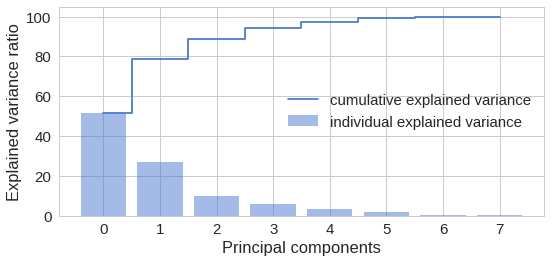

variance ratio  [ 0.51675584  0.26807564  0.10116862  0.0571781   0.03227836  0.01998491
  0.00255524  0.00200328]
[ 0.51675584  0.26807564  0.10116862  0.0571781   0.03227836  0.01998491
  0.00255524]
0.997996718517
          PC1        PC2        PC3       PC4        PC5       PC6       PC7  \
0  -27.191086 -29.677875  19.480712  3.042950   3.118919  4.331896  0.039214   
1   24.476215  -6.024175 -11.394628  5.335957  14.002387  2.178598 -0.660774   
2  -39.938920 -10.828048 -14.768748  2.101549  -4.438677 -3.470541 -0.104414   
3  -48.000825 -29.833257  16.330411  2.836173   5.304497  4.493957  0.352786   
4  147.919433  18.562548 -22.296929  1.584217  -0.318674 -3.915930 -0.245921   

   index  target_class  
0      0             0  
1      1             0  
2      2             0  
3      3             0  
4      4             0  
[ -1.85398820e+01  -1.26854504e+01  -8.51846689e+00   4.42676587e+00
   2.08985273e+00  -8.90899225e-01  -1.93172935e-03]
(13000, 7)
[-0.26721148 -0.296

13000/13000 [==============================] - 1s 41us/step - loss: 0.4361 - acc: 0.9241 - val_loss: 0.7291 - val_acc: 0.8913
Epoch 110/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4353 - acc: 0.9269 - val_loss: 0.7287 - val_acc: 0.8975
Epoch 111/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4347 - acc: 0.9280 - val_loss: 0.7286 - val_acc: 0.8953
Epoch 112/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4340 - acc: 0.9297 - val_loss: 0.7269 - val_acc: 0.9011
Epoch 113/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4334 - acc: 0.9321 - val_loss: 0.7267 - val_acc: 0.9031
Epoch 114/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4328 - acc: 0.9329 - val_loss: 0.7255 - val_acc: 0.8953
Epoch 115/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.4323 - acc: 0.9341 - val_loss: 0.7244 - val_acc: 0.9053
Epoch 116/1000
13000/13000 [

Epoch 225/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.4174 - acc: 0.9459 - val_loss: 0.7148 - val_acc: 0.9193
Epoch 226/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4174 - acc: 0.9471 - val_loss: 0.7170 - val_acc: 0.9148
Epoch 227/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.4174 - acc: 0.9465 - val_loss: 0.7111 - val_acc: 0.9215
Epoch 228/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4173 - acc: 0.9488 - val_loss: 0.7117 - val_acc: 0.9223
Epoch 229/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4173 - acc: 0.9469 - val_loss: 0.7121 - val_acc: 0.9179
Epoch 230/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.4173 - acc: 0.9466 - val_loss: 0.7094 - val_acc: 0.9212
Epoch 231/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4172 - acc: 0.9469 - val_loss: 0.7104 - val_acc: 0.9207
Epoch 232/100

13000/13000 [==============================] - 1s 41us/step - loss: 0.4157 - acc: 0.9488 - val_loss: 0.6876 - val_acc: 0.9257
Epoch 284/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4157 - acc: 0.9508 - val_loss: 0.6882 - val_acc: 0.9204
Epoch 285/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4157 - acc: 0.9498 - val_loss: 0.6859 - val_acc: 0.9265
Epoch 286/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4157 - acc: 0.9484 - val_loss: 0.6848 - val_acc: 0.9263
Epoch 287/1000
13000/13000 [==============================] - 1s 44us/step - loss: 0.4157 - acc: 0.9495 - val_loss: 0.6856 - val_acc: 0.9277
Epoch 288/1000
13000/13000 [==============================] - 1s 44us/step - loss: 0.4156 - acc: 0.9517 - val_loss: 0.6848 - val_acc: 0.9251
Epoch 289/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4156 - acc: 0.9488 - val_loss: 0.6850 - val_acc: 0.9274
Epoch 290/1000
13000/13000 [

13000/13000 [==============================] - 1s 43us/step - loss: 0.4142 - acc: 0.9500 - val_loss: 0.6757 - val_acc: 0.9265
Epoch 400/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.4144 - acc: 0.9514 - val_loss: 0.6969 - val_acc: 0.8581
Epoch 401/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.4147 - acc: 0.9500 - val_loss: 0.6739 - val_acc: 0.9212
Epoch 402/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4142 - acc: 0.9504 - val_loss: 0.6755 - val_acc: 0.9243
Epoch 403/1000
13000/13000 [==============================] - 0s 38us/step - loss: 0.4143 - acc: 0.9515 - val_loss: 0.6744 - val_acc: 0.9282
Epoch 404/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4142 - acc: 0.9522 - val_loss: 0.6728 - val_acc: 0.9310
Epoch 405/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4141 - acc: 0.9523 - val_loss: 0.6734 - val_acc: 0.9246
Epoch 406/1000
13000/13000 [

13000/13000 [==============================] - 1s 42us/step - loss: 0.4136 - acc: 0.9498 - val_loss: 0.6689 - val_acc: 0.9268
Epoch 516/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4135 - acc: 0.9502 - val_loss: 0.6845 - val_acc: 0.9165
Epoch 517/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4135 - acc: 0.9534 - val_loss: 0.6675 - val_acc: 0.9285
Epoch 518/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4135 - acc: 0.9527 - val_loss: 0.6671 - val_acc: 0.9249
Epoch 519/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4135 - acc: 0.9531 - val_loss: 0.6660 - val_acc: 0.9268
Epoch 520/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.4134 - acc: 0.9530 - val_loss: 0.6670 - val_acc: 0.9307
Epoch 521/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4135 - acc: 0.9536 - val_loss: 0.6685 - val_acc: 0.9235
Epoch 522/1000
13000/13000 [

13000/13000 [==============================] - 1s 43us/step - loss: 0.4130 - acc: 0.9558 - val_loss: 0.6634 - val_acc: 0.9215
Epoch 632/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4129 - acc: 0.9529 - val_loss: 0.6629 - val_acc: 0.9218
Epoch 633/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4130 - acc: 0.9528 - val_loss: 0.6657 - val_acc: 0.9235
Epoch 634/1000
13000/13000 [==============================] - 1s 49us/step - loss: 0.4128 - acc: 0.9538 - val_loss: 0.6631 - val_acc: 0.9293
Epoch 635/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4128 - acc: 0.9532 - val_loss: 0.6634 - val_acc: 0.9265
Epoch 636/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.4130 - acc: 0.9544 - val_loss: 0.6781 - val_acc: 0.8623
Epoch 637/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4130 - acc: 0.9506 - val_loss: 0.6657 - val_acc: 0.9321
Epoch 638/1000
13000/13000 [

13000/13000 [==============================] - 1s 40us/step - loss: 0.4128 - acc: 0.9515 - val_loss: 0.6640 - val_acc: 0.9324
Epoch 748/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4127 - acc: 0.9539 - val_loss: 0.6665 - val_acc: 0.9176
Epoch 749/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4127 - acc: 0.9531 - val_loss: 0.6658 - val_acc: 0.9235
Epoch 750/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4125 - acc: 0.9542 - val_loss: 0.6636 - val_acc: 0.9349
Epoch 751/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4125 - acc: 0.9532 - val_loss: 0.6690 - val_acc: 0.9193
Epoch 752/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4126 - acc: 0.9526 - val_loss: 0.6647 - val_acc: 0.9313
Epoch 753/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.4126 - acc: 0.9555 - val_loss: 0.7089 - val_acc: 0.8419
Epoch 754/1000
13000/13000 [

13000/13000 [==============================] - 1s 47us/step - loss: 0.4127 - acc: 0.9528 - val_loss: 0.6668 - val_acc: 0.9073
Epoch 864/1000
13000/13000 [==============================] - 1s 46us/step - loss: 0.4124 - acc: 0.9522 - val_loss: 0.6752 - val_acc: 0.9232
Epoch 865/1000
13000/13000 [==============================] - 1s 46us/step - loss: 0.4126 - acc: 0.9523 - val_loss: 0.6647 - val_acc: 0.9363
Epoch 866/1000
13000/13000 [==============================] - 1s 43us/step - loss: 0.4123 - acc: 0.9538 - val_loss: 0.6653 - val_acc: 0.9154
Epoch 867/1000
13000/13000 [==============================] - 1s 45us/step - loss: 0.4124 - acc: 0.9532 - val_loss: 0.6655 - val_acc: 0.9271
Epoch 868/1000
13000/13000 [==============================] - 1s 43us/step - loss: 0.4123 - acc: 0.9521 - val_loss: 0.6683 - val_acc: 0.9179
Epoch 869/1000
13000/13000 [==============================] - 1s 44us/step - loss: 0.4123 - acc: 0.9549 - val_loss: 0.6738 - val_acc: 0.9165
Epoch 870/1000
13000/13000 [

13000/13000 [==============================] - 1s 46us/step - loss: 0.4122 - acc: 0.9546 - val_loss: 0.6639 - val_acc: 0.9318: 0s - loss: 0.4125 - acc: 
Epoch 980/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4122 - acc: 0.9558 - val_loss: 0.6623 - val_acc: 0.9316
Epoch 981/1000
13000/13000 [==============================] - 1s 44us/step - loss: 0.4125 - acc: 0.9542 - val_loss: 0.6675 - val_acc: 0.9296
Epoch 982/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4121 - acc: 0.9568 - val_loss: 0.6661 - val_acc: 0.9288
Epoch 983/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.4121 - acc: 0.9554 - val_loss: 0.6638 - val_acc: 0.9316
Epoch 984/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4121 - acc: 0.9548 - val_loss: 0.6648 - val_acc: 0.9265
Epoch 985/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.4120 - acc: 0.9553 - val_loss: 0.6684 - val_acc: 0.9168
E

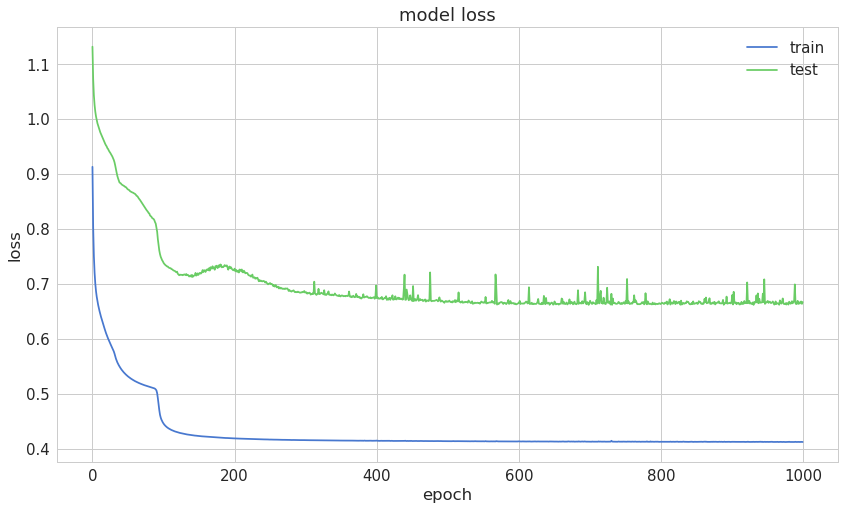

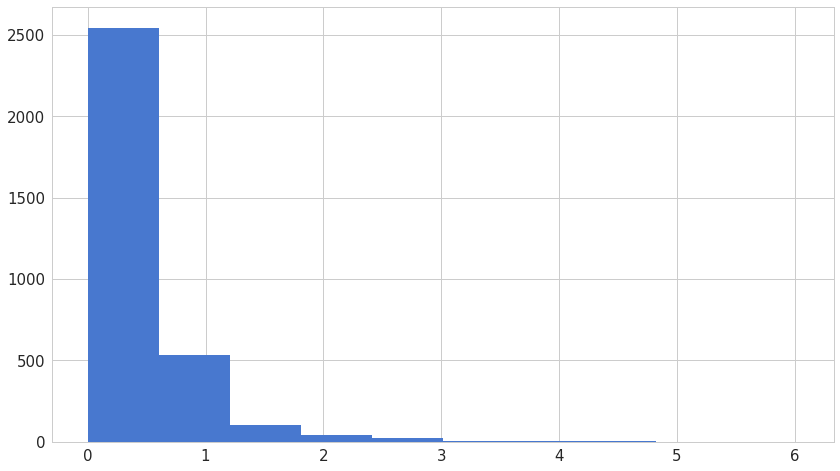

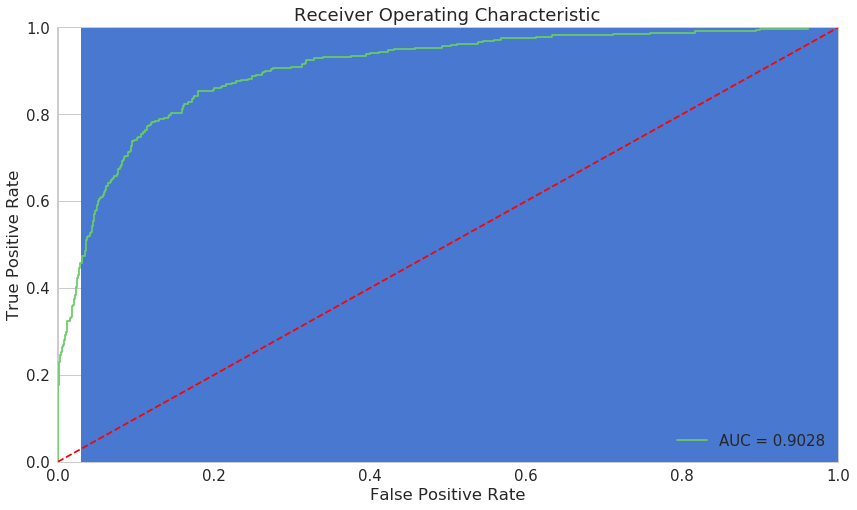

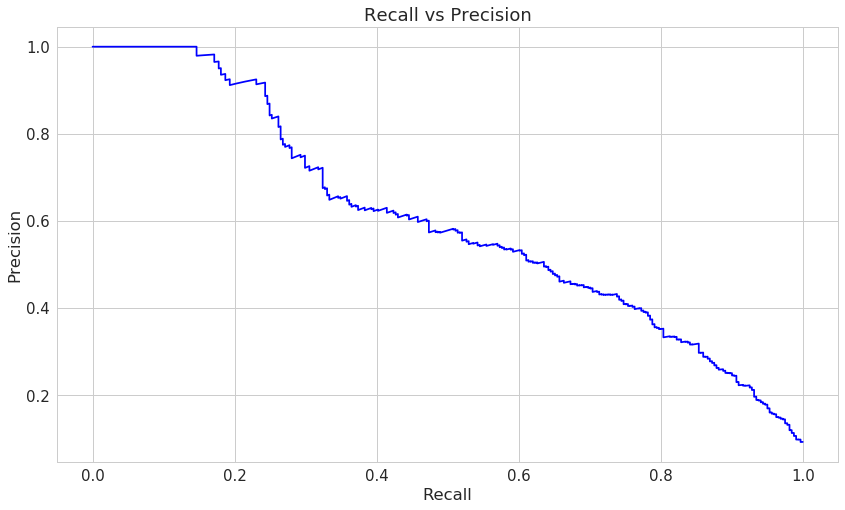

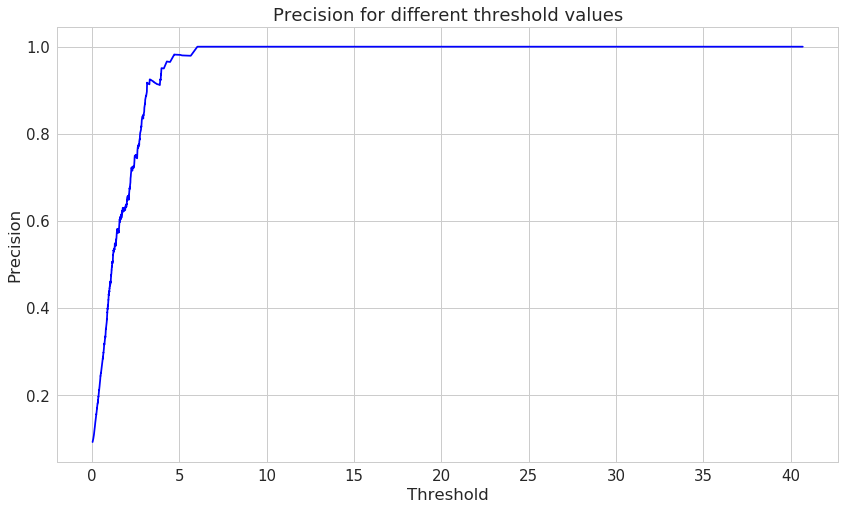

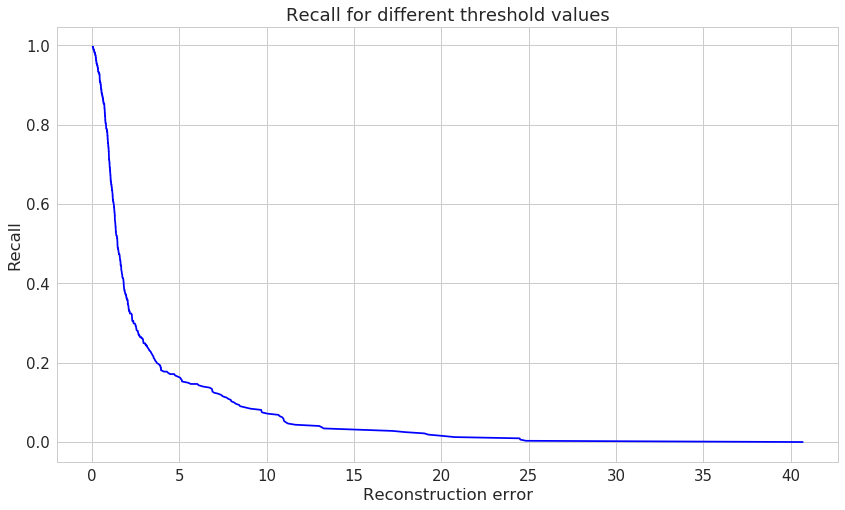

In [184]:


from sklearn.preprocessing import StandardScaler
df = pd.read_csv('pulsar_stars.csv')

 

target_class = df.target_class.values.tolist()

data = data.drop('target_class',axis=1)


PCA_generator(data)

pca_components(data, 7)

pca = PCA(n_components=7)

principalComponents = pca.fit_transform(data)

 

principalDf1 = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

index = list(range(0,len(principalDf1)))

my_data = {'index':index,'PC1': principalDf1.PC1.values.tolist(),'PC2': principalDf1.PC2.values.tolist(),'PC3': principalDf1.PC3.values.tolist(),'PC4': principalDf1.PC4.values.tolist(),'PC5': principalDf1.PC5.values.tolist(),'PC6': principalDf1.PC6.values.tolist(),'PC7': principalDf1.PC7.values.tolist(),'target_class':target_class}

data = pd.DataFrame.from_dict(my_data)

print(data.head())

#train a neural network on the reduced dataset through PCA

data = data[['target_class','PC1','PC2','PC3','PC4','PC5','PC6','PC7']]

 

X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train[X_train.target_class == 0]

X_train = X_train.drop(['target_class'], axis=1)

y_test = X_test['target_class']

X_test = X_test.drop(['target_class'], axis=1)

 

X_train = X_train.values
X_test = X_test.values

print(X_train[0])

print(X_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[0])

 

 

input_dim = X_train.shape[1]

encoding_dim = 14

 

input_layer = Input(shape=(input_dim, ))

 

encoder = Dense(encoding_dim, activation="tanh",

                activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

 

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

decoder = Dense(input_dim, activation='relu')(decoder)

 

autoencoder = Model(inputs=input_layer, outputs=decoder)

 

 

nb_epoch = 1000

batch_size = 32

 

autoencoder.compile(optimizer='sgd',

                    loss='mean_squared_error',

                    metrics=['accuracy'])

 

checkpointer = ModelCheckpoint(filepath="model.h5",

                               verbose=0,

                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',

                          histogram_freq=0,

                          write_graph=True,

                          write_images=True)

 

history = autoencoder.fit(X_train, X_train,

                    epochs=nb_epoch,

                    batch_size=batch_size,

                    shuffle=True,

                    validation_data=(X_test, X_test),

                    verbose=1,

                    callbacks=[checkpointer, tensorboard]).history

 

 

autoencoder = load_model('model.h5')

 

plt.plot(history['loss'])

plt.plot(history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right');

plt.show()

 

predictions = autoencoder.predict(X_test)

 

mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,

                        'true_class': y_test})

 

error_df.describe()

 

fig = plt.figure()

ax = fig.add_subplot(111)

normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]

_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

 

fig = plt.figure()

ax = fig.add_subplot(111)

fraud_error_df = error_df[error_df['true_class'] == 1]

_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

 

 

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,

                             roc_curve, recall_score, classification_report, f1_score,

                             precision_recall_fscore_support)

 

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)

roc_auc = auc(fpr, tpr)

 

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.001, 1])

plt.ylim([0, 1.001])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

 

 

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)

plt.plot(recall, precision, 'b', label='Precision-Recall curve')

plt.title('Recall vs Precision')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.show()

 

plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')

plt.title('Precision for different threshold values')

plt.xlabel('Threshold')

plt.ylabel('Precision')

plt.show()

 

plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')

plt.title('Recall for different threshold values')

plt.xlabel('Reconstruction error')

plt.ylabel('Recall')

plt.show()

 


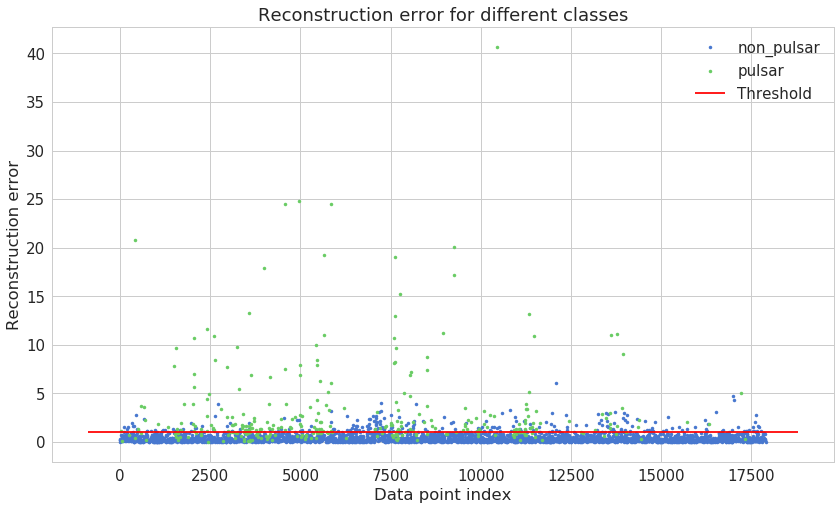

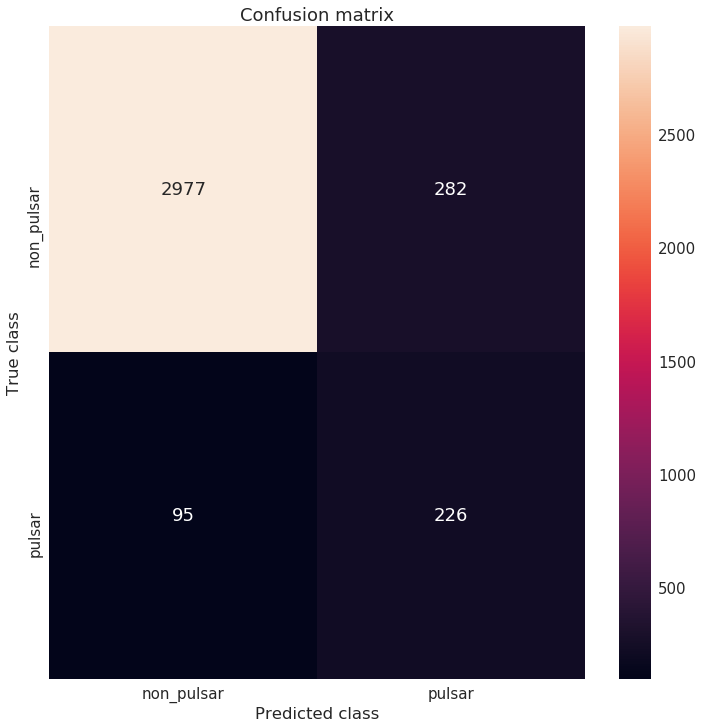

In [185]:

threshold = 1

groups = error_df.groupby('true_class')

fig, ax = plt.subplots()

 

for name, group in groups:

    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',

            label= "pulsar" if name == 1 else "non_pulsar")

ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')

ax.legend()

plt.title("Reconstruction error for different classes")

plt.ylabel("Reconstruction error")

plt.xlabel("Data point index")

plt.show();

 

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, y_pred)

 

plt.figure(figsize=(12, 12))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");

plt.title("Confusion matrix")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()

In [186]:
#PCA on filtered

Covariance matrix 
[[ 1.00005588 -0.87394721 -0.73881612 -0.29885754 -0.30703299]
 [-0.87394721  1.00005588  0.9457819   0.41439076  0.43290435]
 [-0.73881612  0.9457819   1.00005588  0.41207946  0.41516316]
 [-0.29885754  0.41439076  0.41207946  1.00005588  0.79659935]
 [-0.30703299  0.43290435  0.41516316  0.79659935  1.00005588]]
Eigenvectors 
[[-0.45527368  0.37295607  0.30137216  0.74952401  0.03190976]
 [ 0.51620848 -0.29032603  0.79324939  0.13769397  0.03217739]
 [ 0.49488089 -0.25734362 -0.52702301  0.64106944 -0.01199539]
 [ 0.37266161  0.60048925  0.01424542 -0.04812045 -0.70570353]
 [ 0.3774532   0.59144018 -0.0444303  -0.07725623  0.70695475]]

Eigenvalues 
[ 3.29324412  1.22208431  0.02285617  0.25842742  0.20366737]
Eigenvalues in descending order:
3.29324411667
1.22208430882
0.258427416556
0.203667368806
0.0228561655746


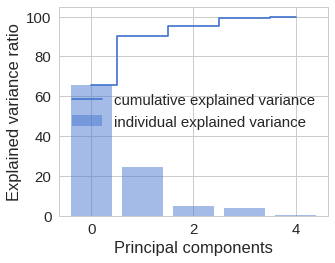

variance ratio  [ 0.65861202  0.24440321  0.0516826   0.0407312   0.00457098]


In [187]:


from sklearn.preprocessing import StandardScaler
df = pd.read_csv('pulsar_stars.csv')
data = df[[' Mean of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       'target_class']]
 

target_class = df.target_class.values.tolist()
data = data.drop('target_class',axis=1)


PCA_generator(data)


[ 0.65861202  0.24440321  0.0516826   0.0407312 ]
0.99542902229
         PC1        PC2       PC3       PC4  index  target_class
0 -23.209142  21.667905  0.452387  2.857309      0             0
1 -10.478565 -13.762980  4.667550 -2.963031      1             0
2  -6.187406 -11.632609 -0.569995 -1.650723      2             0
3 -20.401224  18.775479 -0.783831  2.229497      3             0
4  -6.533352 -27.130984  7.794872 -3.476043      4             0
[-10.60167254  -7.15174707   2.35997455  -1.59566097]
(13000, 4)
[-0.14842398 -0.48580987  0.19101178 -0.52243822]
Train on 13000 samples, validate on 3580 samples
Epoch 1/1000
13000/13000 [==============================] - 1s 63us/step - loss: 0.8743 - acc: 0.5982 - val_loss: 1.5681 - val_acc: 0.6592
Epoch 2/1000
13000/13000 [==============================] - 1s 45us/step - loss: 0.7527 - acc: 0.7356 - val_loss: 1.4840 - val_acc: 0.7170
Epoch 3/1000
13000/13000 [==============================] - 1s 47us/step - loss: 0.7039 - acc: 0.7903 - 

13000/13000 [==============================] - 1s 40us/step - loss: 0.6073 - acc: 0.8838 - val_loss: 1.2450 - val_acc: 0.8637
Epoch 114/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.6073 - acc: 0.8835 - val_loss: 1.2439 - val_acc: 0.8662
Epoch 115/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.6072 - acc: 0.8837 - val_loss: 1.2428 - val_acc: 0.8623
Epoch 116/1000
13000/13000 [==============================] - 1s 45us/step - loss: 0.6072 - acc: 0.8840 - val_loss: 1.2417 - val_acc: 0.8620
Epoch 117/1000
13000/13000 [==============================] - 1s 49us/step - loss: 0.6071 - acc: 0.8840 - val_loss: 1.2408 - val_acc: 0.8642
Epoch 118/1000
13000/13000 [==============================] - 1s 50us/step - loss: 0.6070 - acc: 0.8851 - val_loss: 1.2390 - val_acc: 0.8651
Epoch 119/1000
13000/13000 [==============================] - 1s 52us/step - loss: 0.6069 - acc: 0.8863 - val_loss: 1.2346 - val_acc: 0.8696
Epoch 120/1000
13000/13000 [

13000/13000 [==============================] - 1s 40us/step - loss: 0.3899 - acc: 0.9645 - val_loss: 0.8112 - val_acc: 0.9536
Epoch 230/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.3899 - acc: 0.9653 - val_loss: 0.8108 - val_acc: 0.9587
Epoch 231/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3900 - acc: 0.9655 - val_loss: 0.8118 - val_acc: 0.9564
Epoch 232/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3898 - acc: 0.9654 - val_loss: 0.8105 - val_acc: 0.9598
Epoch 233/1000
13000/13000 [==============================] - 1s 43us/step - loss: 0.3898 - acc: 0.9650 - val_loss: 0.8101 - val_acc: 0.9612
Epoch 234/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.3898 - acc: 0.9658 - val_loss: 0.8103 - val_acc: 0.9592
Epoch 235/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3897 - acc: 0.9647 - val_loss: 0.8080 - val_acc: 0.9617
Epoch 236/1000
13000/13000 [

13000/13000 [==============================] - 1s 40us/step - loss: 0.3891 - acc: 0.9689 - val_loss: 0.7739 - val_acc: 0.9497
Epoch 346/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.3888 - acc: 0.9678 - val_loss: 0.7746 - val_acc: 0.9584
Epoch 347/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3887 - acc: 0.9692 - val_loss: 0.7620 - val_acc: 0.9654
Epoch 348/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3888 - acc: 0.9680 - val_loss: 0.7627 - val_acc: 0.9623
Epoch 349/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3888 - acc: 0.9694 - val_loss: 0.7664 - val_acc: 0.9654
Epoch 350/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3887 - acc: 0.9687 - val_loss: 0.7656 - val_acc: 0.9673
Epoch 351/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.3887 - acc: 0.9682 - val_loss: 0.7657 - val_acc: 0.9561
Epoch 352/1000
13000/13000 [

13000/13000 [==============================] - 1s 42us/step - loss: 0.3884 - acc: 0.9698 - val_loss: 0.7485 - val_acc: 0.9623
Epoch 462/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.3883 - acc: 0.9694 - val_loss: 0.7463 - val_acc: 0.9587
Epoch 463/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.3882 - acc: 0.9701 - val_loss: 0.7497 - val_acc: 0.9648
Epoch 464/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3882 - acc: 0.9690 - val_loss: 0.7499 - val_acc: 0.9634
Epoch 465/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3882 - acc: 0.9699 - val_loss: 0.7444 - val_acc: 0.9645
Epoch 466/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3881 - acc: 0.9704 - val_loss: 0.7450 - val_acc: 0.9601
Epoch 467/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3881 - acc: 0.9696 - val_loss: 0.7465 - val_acc: 0.9648
Epoch 468/1000
13000/13000 [

13000/13000 [==============================] - 1s 42us/step - loss: 0.3877 - acc: 0.9712 - val_loss: 0.7220 - val_acc: 0.9642
Epoch 578/1000
13000/13000 [==============================] - 1s 43us/step - loss: 0.3878 - acc: 0.9712 - val_loss: 0.7207 - val_acc: 0.9640
Epoch 579/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3878 - acc: 0.9701 - val_loss: 0.7215 - val_acc: 0.9642
Epoch 580/1000
13000/13000 [==============================] - 1s 43us/step - loss: 0.3879 - acc: 0.9711 - val_loss: 0.7218 - val_acc: 0.9668
Epoch 581/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3877 - acc: 0.9714 - val_loss: 0.7225 - val_acc: 0.9637
Epoch 582/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3878 - acc: 0.9709 - val_loss: 0.7217 - val_acc: 0.9670
Epoch 583/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3877 - acc: 0.9724 - val_loss: 0.7213 - val_acc: 0.9656
Epoch 584/1000
13000/13000 [

13000/13000 [==============================] - 1s 41us/step - loss: 0.3875 - acc: 0.9687 - val_loss: 0.7035 - val_acc: 0.9631
Epoch 694/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.3874 - acc: 0.9705 - val_loss: 0.7029 - val_acc: 0.9642
Epoch 695/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3874 - acc: 0.9706 - val_loss: 0.7031 - val_acc: 0.9637
Epoch 696/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3874 - acc: 0.9718 - val_loss: 0.7036 - val_acc: 0.9631
Epoch 697/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3875 - acc: 0.9702 - val_loss: 0.7024 - val_acc: 0.9654
Epoch 698/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.3874 - acc: 0.9698 - val_loss: 0.7034 - val_acc: 0.9623
Epoch 699/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3876 - acc: 0.9700 - val_loss: 0.7023 - val_acc: 0.9642
Epoch 700/1000
13000/13000 [

13000/13000 [==============================] - 1s 40us/step - loss: 0.3872 - acc: 0.9698 - val_loss: 0.6897 - val_acc: 0.9665
Epoch 810/1000
13000/13000 [==============================] - 1s 43us/step - loss: 0.3871 - acc: 0.9702 - val_loss: 0.6892 - val_acc: 0.9654
Epoch 811/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3871 - acc: 0.9709 - val_loss: 0.6898 - val_acc: 0.9662
Epoch 812/1000
13000/13000 [==============================] - 1s 39us/step - loss: 0.3871 - acc: 0.9700 - val_loss: 0.6896 - val_acc: 0.9654
Epoch 813/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3871 - acc: 0.9702 - val_loss: 0.6900 - val_acc: 0.9601
Epoch 814/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3872 - acc: 0.9687 - val_loss: 0.6919 - val_acc: 0.9659
Epoch 815/1000
13000/13000 [==============================] - 1s 43us/step - loss: 0.3872 - acc: 0.9696 - val_loss: 0.6884 - val_acc: 0.9690
Epoch 816/1000
13000/13000 [

13000/13000 [==============================] - 1s 40us/step - loss: 0.3869 - acc: 0.9705 - val_loss: 0.6797 - val_acc: 0.9676
Epoch 926/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.3874 - acc: 0.9707 - val_loss: 0.6894 - val_acc: 0.9589
Epoch 927/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3872 - acc: 0.9693 - val_loss: 0.6777 - val_acc: 0.9726
Epoch 928/1000
13000/13000 [==============================] - 1s 41us/step - loss: 0.3869 - acc: 0.9705 - val_loss: 0.6909 - val_acc: 0.9439
Epoch 929/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3872 - acc: 0.9705 - val_loss: 0.6782 - val_acc: 0.9676
Epoch 930/1000
13000/13000 [==============================] - 1s 42us/step - loss: 0.3869 - acc: 0.9710 - val_loss: 0.6805 - val_acc: 0.9637
Epoch 931/1000
13000/13000 [==============================] - 1s 40us/step - loss: 0.3869 - acc: 0.9700 - val_loss: 0.6792 - val_acc: 0.9709
Epoch 932/1000
13000/13000 [

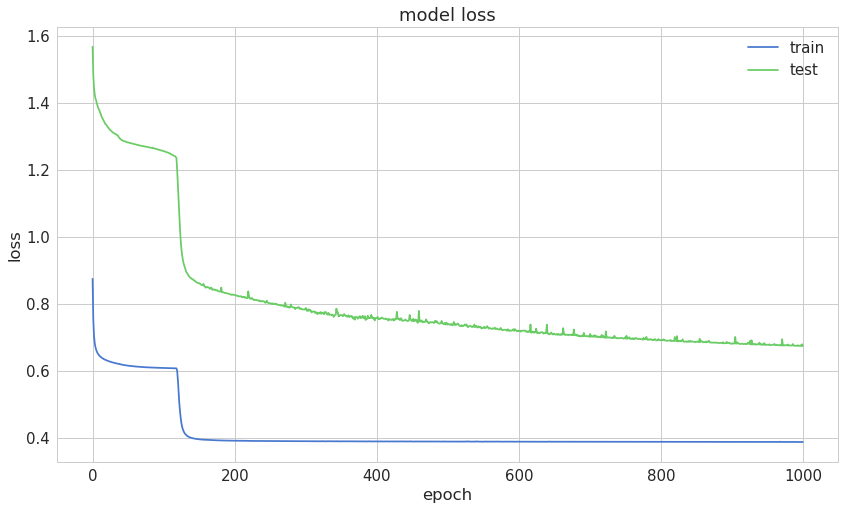

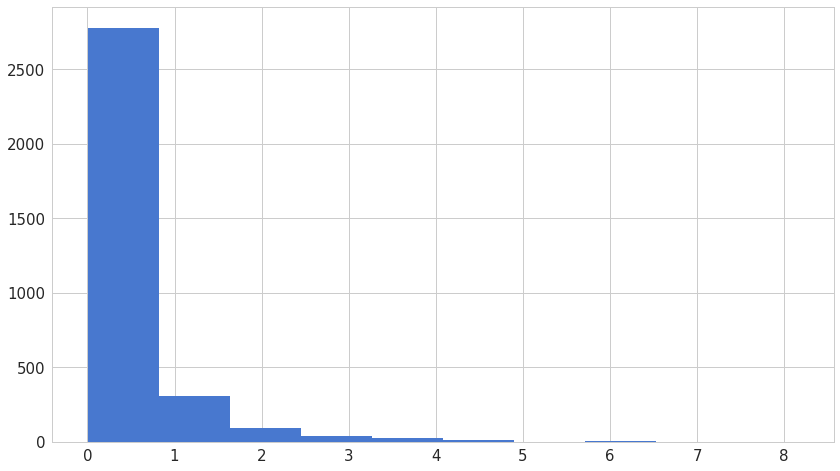

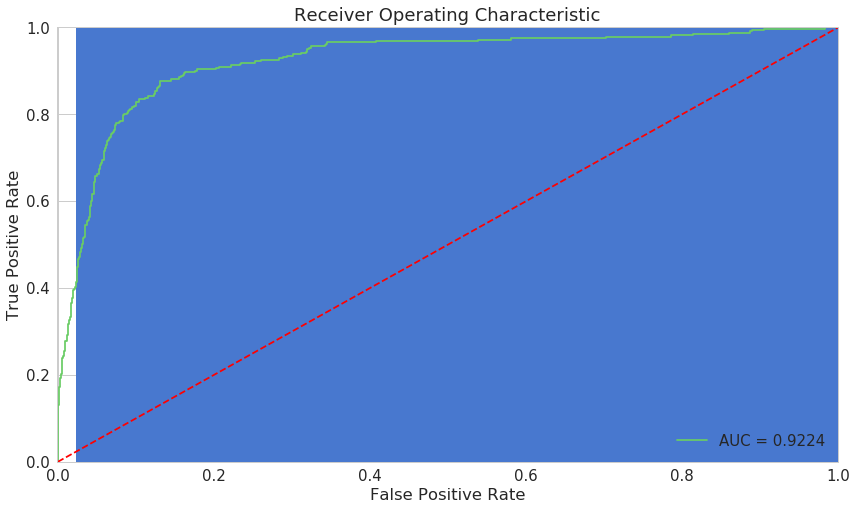

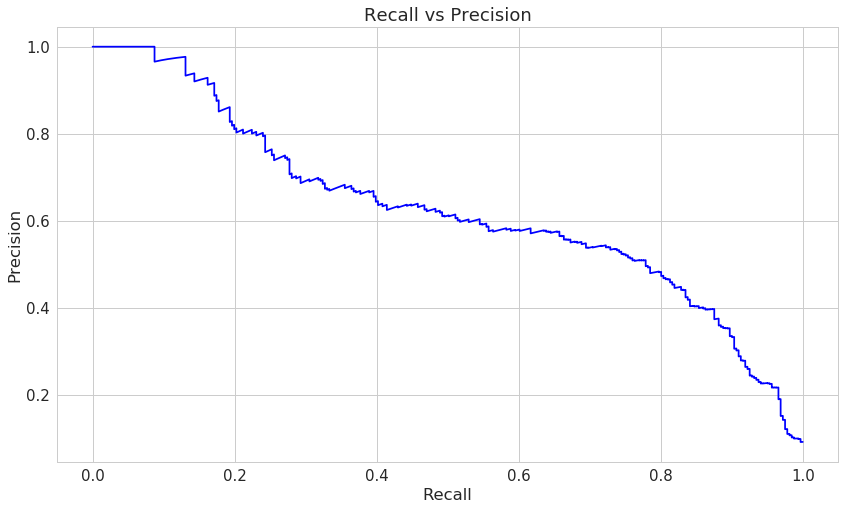

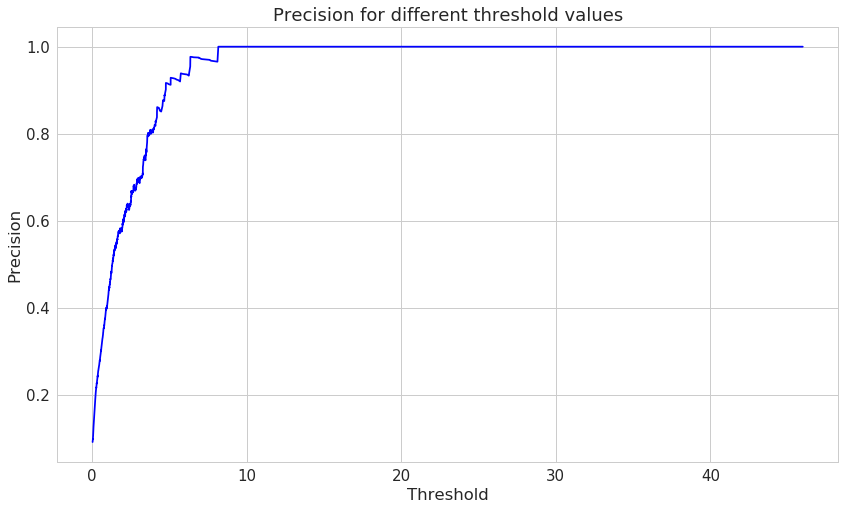

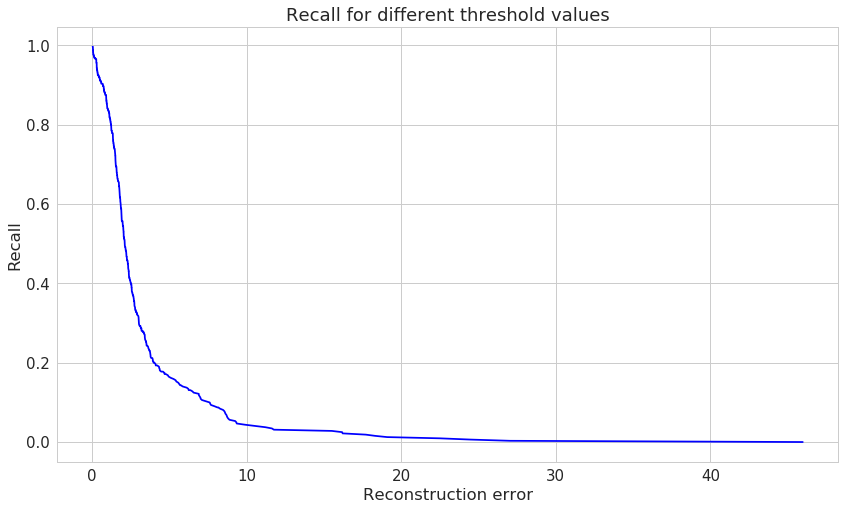

In [188]:

pca_components(data, 4)

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(data)

 

principalDf1 = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3','PC4'])

index = list(range(0,len(principalDf1)))

my_data = {'index':index,'PC1': principalDf1.PC1.values.tolist(),'PC2': principalDf1.PC2.values.tolist(),'PC3': principalDf1.PC3.values.tolist(),'PC4': principalDf1.PC4.values.tolist(),'target_class':target_class}

data = pd.DataFrame.from_dict(my_data)

print(data.head())

#train a neural network on the reduced dataset through PCA

data = data[['target_class','PC1','PC2','PC3','PC4']]

 

X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train[X_train.target_class == 0]

X_train = X_train.drop(['target_class'], axis=1)

y_test = X_test['target_class']

X_test = X_test.drop(['target_class'], axis=1)

 

X_train = X_train.values
X_test = X_test.values

print(X_train[0])

print(X_train.shape)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[0])

 

 

input_dim = X_train.shape[1]

encoding_dim = 14

 

input_layer = Input(shape=(input_dim, ))

 

encoder = Dense(encoding_dim, activation="tanh",

                activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

 

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

decoder = Dense(input_dim, activation='relu')(decoder)

 

autoencoder = Model(inputs=input_layer, outputs=decoder)

 

 

nb_epoch = 1000

batch_size = 32

 

autoencoder.compile(optimizer='sgd',

                    loss='mean_squared_error',

                    metrics=['accuracy'])

 

checkpointer = ModelCheckpoint(filepath="model.h5",

                               verbose=0,

                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',

                          histogram_freq=0,

                          write_graph=True,

                          write_images=True)

 

history = autoencoder.fit(X_train, X_train,

                    epochs=nb_epoch,

                    batch_size=batch_size,

                    shuffle=True,

                    validation_data=(X_test, X_test),

                    verbose=1,

                    callbacks=[checkpointer, tensorboard]).history

 

 

autoencoder = load_model('model.h5')

 

plt.plot(history['loss'])

plt.plot(history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right');

plt.show()

 

predictions = autoencoder.predict(X_test)

 

mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,

                        'true_class': y_test})

 

error_df.describe()

 

fig = plt.figure()

ax = fig.add_subplot(111)

normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]

_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

 

fig = plt.figure()

ax = fig.add_subplot(111)

fraud_error_df = error_df[error_df['true_class'] == 1]

_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

 

 

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,

                             roc_curve, recall_score, classification_report, f1_score,

                             precision_recall_fscore_support)

 

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)

roc_auc = auc(fpr, tpr)

 

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.001, 1])

plt.ylim([0, 1.001])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

 

 

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)

plt.plot(recall, precision, 'b', label='Precision-Recall curve')

plt.title('Recall vs Precision')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.show()

 

plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')

plt.title('Precision for different threshold values')

plt.xlabel('Threshold')

plt.ylabel('Precision')

plt.show()

 

plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')

plt.title('Recall for different threshold values')

plt.xlabel('Reconstruction error')

plt.ylabel('Recall')

plt.show()

 


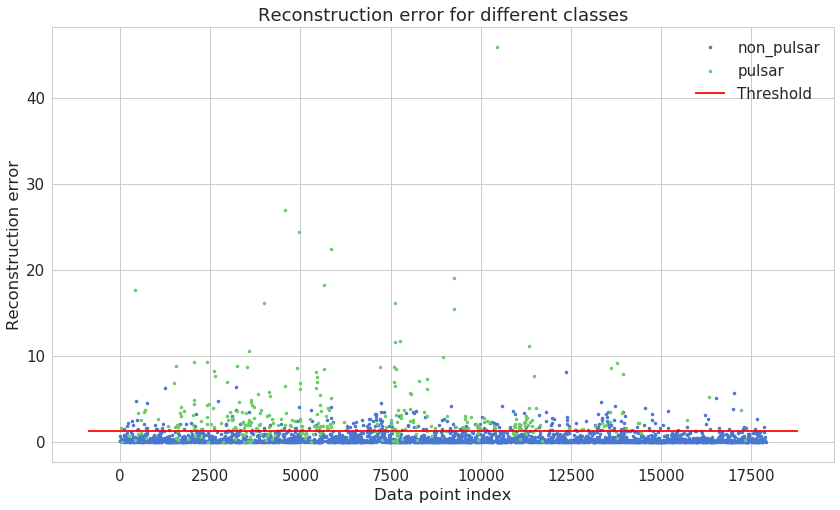

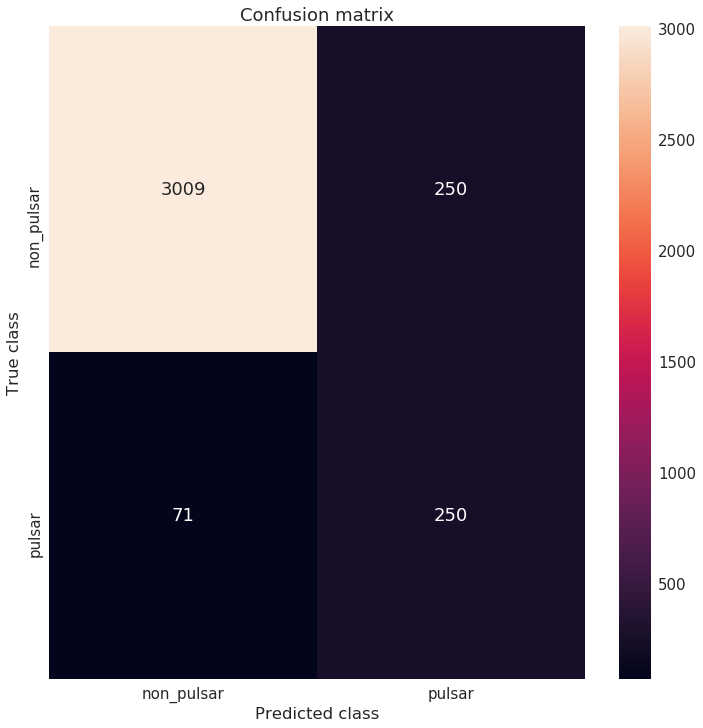

In [189]:

threshold = 1.3

groups = error_df.groupby('true_class')

fig, ax = plt.subplots()

 

for name, group in groups:

    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',

            label= "pulsar" if name == 1 else "non_pulsar")

ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')

ax.legend()

plt.title("Reconstruction error for different classes")

plt.ylabel("Reconstruction error")

plt.xlabel("Data point index")

plt.show();

 

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.true_class, y_pred)

 

plt.figure(figsize=(12, 12))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");

plt.title("Confusion matrix")

plt.ylabel('True class')

plt.xlabel('Predicted class')

plt.show()

In [190]:
#outliers removalV
#outliers removal filteredV
#outliers removal PCA
#outliers removal filtered PCA 

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline


sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["non_pulsar", "pulsar"]


Using TensorFlow backend.


In [2]:
df = pd.read_csv('pulsar_stars.csv')

filt_df = df.loc[:, df.columns != 'target_class']

low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)

filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

filt_df = pd.concat([df.loc[:,'target_class'], filt_df], axis=1)

filt_df.dropna(inplace=True)
print(filt_df.head())

       Mean of the integrated profile  \
0.05                        57.491797   
0.95                       143.072656   

       Standard deviation of the integrated profile  \
0.05                                      34.714316   
0.95                                      56.473756   

       Excess kurtosis of the integrated profile  \
0.05                                   -0.231671   
0.95                                    2.706561   

       Skewness of the integrated profile   Mean of the DM-SNR curve  \
0.05                            -0.556371                   1.005853   
0.95                            10.138507                  82.966973   

       Standard deviation of the DM-SNR curve  \
0.05                                11.082345   
0.95                                74.621642   

       Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  
0.05                              0.530908                      -0.499720  
0.95                             15.

In [3]:
from sklearn.preprocessing import StandardScaler

X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.target_class == 0]
X_train = X_train.drop(['target_class'], axis=1)

y_test = X_test['target_class']
X_test = X_test.drop(['target_class'], axis=1)

X_train = X_train.values
X_test = X_test.values
print(X_train[0])
print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[0])

[  1.08765625e+02   4.75204700e+01   1.91285119e-01   7.94546100e-03
   2.92140468e+00   1.80095806e+01   8.46825752e+00   8.41371114e+01]
(13000, 8)
(3580, 8)
[-0.447012    0.03095304 -0.05752827 -0.36626491 -0.24201311 -0.31251915
 -0.0990785  -0.28040627]


In [4]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [5]:
nb_epoch = 1000
batch_size = 320

autoencoder.compile(optimizer='sgd', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 13000 samples, validate on 3580 samples
Epoch 1/1000
13000/13000 [==============================] - 1s 40us/step - loss: 1.2448 - acc: 0.1465 - val_loss: 7.5120 - val_acc: 0.1743
Epoch 2/1000
13000/13000 [==============================] - 0s 7us/step - loss: 1.2016 - acc: 0.2022 - val_loss: 7.4712 - val_acc: 0.2042
Epoch 3/1000
13000/13000 [==============================] - 0s 8us/step - loss: 1.1762 - acc: 0.2241 - val_loss: 7.4436 - val_acc: 0.2182
Epoch 4/1000
13000/13000 [==============================] - 0s 8us/step - loss: 1.1581 - acc: 0.2367 - val_loss: 7.4224 - val_acc: 0.2285
Epoch 5/1000
13000/13000 [==============================] - 0s 9us/step - loss: 1.1427 - acc: 0.2394 - val_loss: 7.4048 - val_acc: 0.2279
Epoch 6/1000
13000/13000 [==============================] - 0s 8us/step - loss: 1.1285 - acc: 0.2370 - val_loss: 7.3900 - val_acc: 0.2263
Epoch 7/1000
13000/13000 [==============================] - 0s 8us/step - loss: 1.1149 - acc: 0.2355 - val_loss: 7.3768 - 

Epoch 118/1000
13000/13000 [==============================] - 0s 9us/step - loss: 0.6884 - acc: 0.6738 - val_loss: 5.6159 - val_acc: 0.6818
Epoch 119/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.6872 - acc: 0.6747 - val_loss: 5.6095 - val_acc: 0.6824
Epoch 120/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6860 - acc: 0.6764 - val_loss: 5.6035 - val_acc: 0.6821
Epoch 121/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6848 - acc: 0.6772 - val_loss: 5.5976 - val_acc: 0.6835
Epoch 122/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6836 - acc: 0.6775 - val_loss: 5.5920 - val_acc: 0.6835
Epoch 123/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.6824 - acc: 0.6782 - val_loss: 5.5853 - val_acc: 0.6860
Epoch 124/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6812 - acc: 0.6797 - val_loss: 5.5808 - val_acc: 0.6866
Epoch 125/1000
13000

13000/13000 [==============================] - 0s 7us/step - loss: 0.6155 - acc: 0.7361 - val_loss: 5.0186 - val_acc: 0.7374
Epoch 235/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6152 - acc: 0.7358 - val_loss: 5.0161 - val_acc: 0.7374
Epoch 236/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6149 - acc: 0.7358 - val_loss: 5.0123 - val_acc: 0.7369
Epoch 237/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6146 - acc: 0.7362 - val_loss: 5.0067 - val_acc: 0.7363
Epoch 238/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.6143 - acc: 0.7362 - val_loss: 5.0036 - val_acc: 0.7374
Epoch 239/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6141 - acc: 0.7362 - val_loss: 4.9988 - val_acc: 0.7369
Epoch 240/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.6138 - acc: 0.7360 - val_loss: 4.9965 - val_acc: 0.7374
Epoch 241/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 6us/step - loss: 0.5939 - acc: 0.7424 - val_loss: 4.6788 - val_acc: 0.7492
Epoch 351/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5938 - acc: 0.7421 - val_loss: 4.6744 - val_acc: 0.7497
Epoch 352/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5936 - acc: 0.7428 - val_loss: 4.6735 - val_acc: 0.7486
Epoch 353/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5935 - acc: 0.7425 - val_loss: 4.6718 - val_acc: 0.7492
Epoch 354/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5934 - acc: 0.7425 - val_loss: 4.6691 - val_acc: 0.7500
Epoch 355/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5933 - acc: 0.7434 - val_loss: 4.6676 - val_acc: 0.7497
Epoch 356/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5931 - acc: 0.7422 - val_loss: 4.6645 - val_acc: 0.7492
Epoch 357/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 7us/step - loss: 0.5839 - acc: 0.7452 - val_loss: 4.4405 - val_acc: 0.7534
Epoch 467/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5838 - acc: 0.7458 - val_loss: 4.4383 - val_acc: 0.7528
Epoch 468/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5837 - acc: 0.7465 - val_loss: 4.4382 - val_acc: 0.7522
Epoch 469/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5837 - acc: 0.7453 - val_loss: 4.4373 - val_acc: 0.7508
Epoch 470/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5836 - acc: 0.7455 - val_loss: 4.4350 - val_acc: 0.7517
Epoch 471/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5836 - acc: 0.7468 - val_loss: 4.4317 - val_acc: 0.7514
Epoch 472/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5835 - acc: 0.7460 - val_loss: 4.4280 - val_acc: 0.7514
Epoch 473/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 7us/step - loss: 0.5782 - acc: 0.7470 - val_loss: 4.2494 - val_acc: 0.7531
Epoch 583/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5781 - acc: 0.7458 - val_loss: 4.2523 - val_acc: 0.7534
Epoch 584/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.5781 - acc: 0.7466 - val_loss: 4.2445 - val_acc: 0.7520
Epoch 585/1000
13000/13000 [==============================] - 0s 9us/step - loss: 0.5780 - acc: 0.7469 - val_loss: 4.2476 - val_acc: 0.7520
Epoch 586/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.5780 - acc: 0.7466 - val_loss: 4.2381 - val_acc: 0.7534
Epoch 587/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.5780 - acc: 0.7464 - val_loss: 4.2407 - val_acc: 0.7542
Epoch 588/1000
13000/13000 [==============================] - 0s 9us/step - loss: 0.5779 - acc: 0.7462 - val_loss: 4.2404 - val_acc: 0.7522
Epoch 589/1000
13000/13000 [======

13000/13000 [==============================] - 0s 6us/step - loss: 0.5742 - acc: 0.7471 - val_loss: 4.0955 - val_acc: 0.7561
Epoch 699/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5742 - acc: 0.7468 - val_loss: 4.0895 - val_acc: 0.7545
Epoch 700/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5741 - acc: 0.7476 - val_loss: 4.0933 - val_acc: 0.7522
Epoch 701/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5742 - acc: 0.7468 - val_loss: 4.0874 - val_acc: 0.7520
Epoch 702/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5741 - acc: 0.7484 - val_loss: 4.0918 - val_acc: 0.7531
Epoch 703/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5741 - acc: 0.7467 - val_loss: 4.0915 - val_acc: 0.7522
Epoch 704/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.5741 - acc: 0.7465 - val_loss: 4.0868 - val_acc: 0.7550
Epoch 705/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 7us/step - loss: 0.5714 - acc: 0.7477 - val_loss: 3.9495 - val_acc: 0.7559
Epoch 815/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5714 - acc: 0.7470 - val_loss: 3.9655 - val_acc: 0.7553
Epoch 816/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5714 - acc: 0.7468 - val_loss: 3.9623 - val_acc: 0.7570
Epoch 817/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5714 - acc: 0.7471 - val_loss: 3.9569 - val_acc: 0.7559
Epoch 818/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5713 - acc: 0.7471 - val_loss: 3.9580 - val_acc: 0.7564
Epoch 819/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5713 - acc: 0.7478 - val_loss: 3.9552 - val_acc: 0.7542
Epoch 820/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5713 - acc: 0.7472 - val_loss: 3.9590 - val_acc: 0.7553
Epoch 821/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 6us/step - loss: 0.5694 - acc: 0.7468 - val_loss: 3.8465 - val_acc: 0.7539
Epoch 931/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5697 - acc: 0.7468 - val_loss: 3.8483 - val_acc: 0.7547
Epoch 932/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5697 - acc: 0.7466 - val_loss: 3.8444 - val_acc: 0.7567
Epoch 933/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5695 - acc: 0.7473 - val_loss: 3.8478 - val_acc: 0.7567
Epoch 934/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5694 - acc: 0.7470 - val_loss: 3.8383 - val_acc: 0.7545
Epoch 935/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.5696 - acc: 0.7456 - val_loss: 3.8347 - val_acc: 0.7542
Epoch 936/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5695 - acc: 0.7465 - val_loss: 3.8380 - val_acc: 0.7547
Epoch 937/1000
13000/13000 [=======

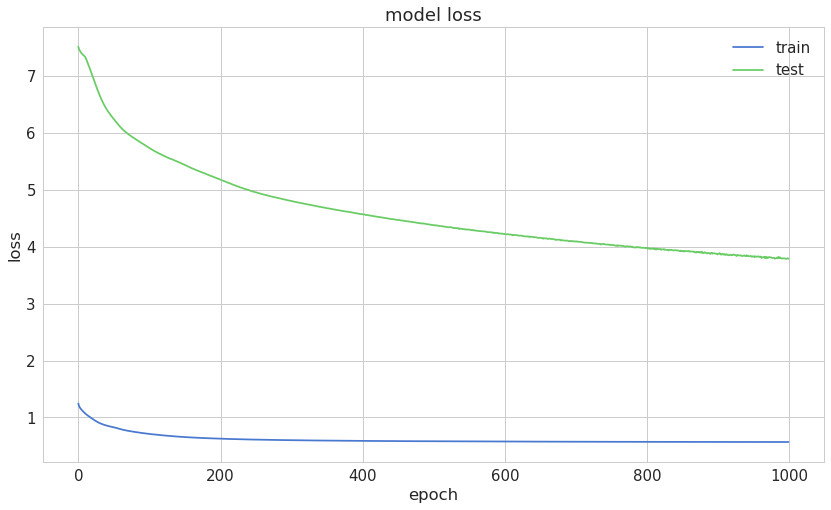

,reconstruction_error,true_class
count,3580.000000,3580.000000
mean,3.770461,0.089665
std,20.733040,0.285741
min,0.020554,0.000000
25%,0.132145,0.000000
50%,0.241531,0.000000
75%,0.618417,0.000000
max,419.469900,1.000000


In [7]:
autoencoder = load_model('model.h5')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

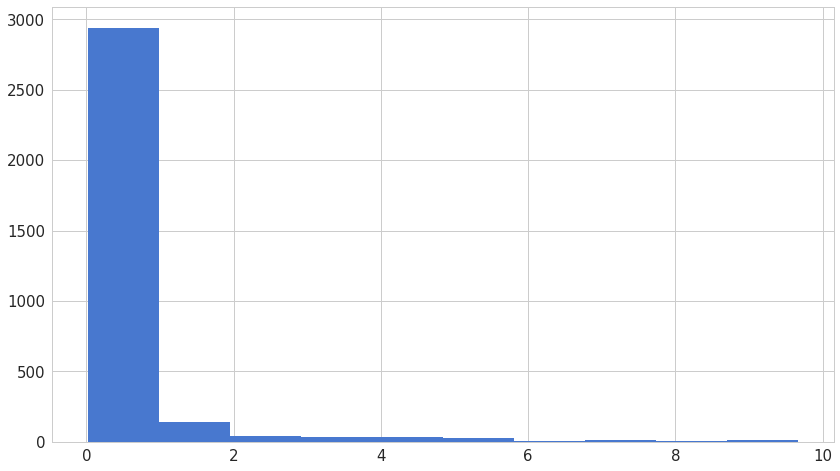

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)


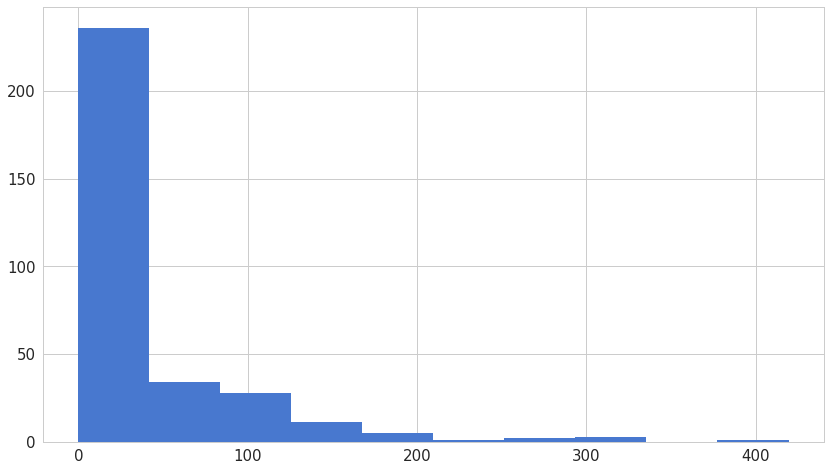

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [10]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

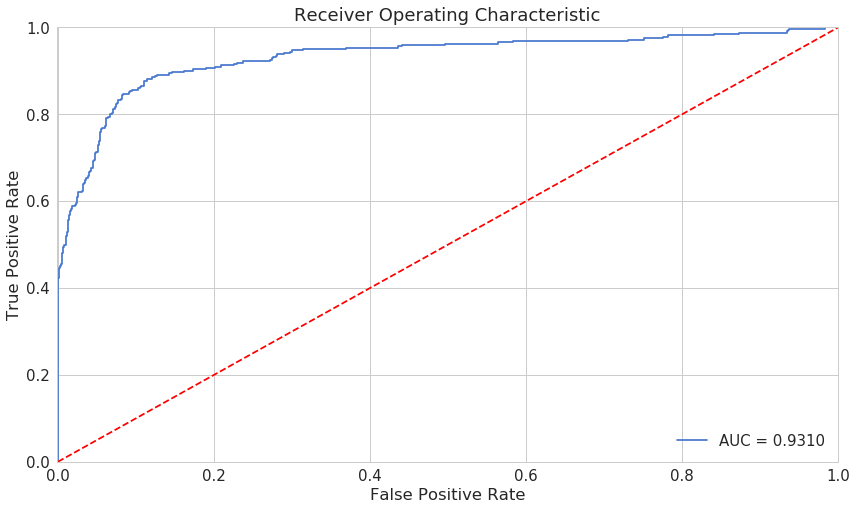

In [11]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

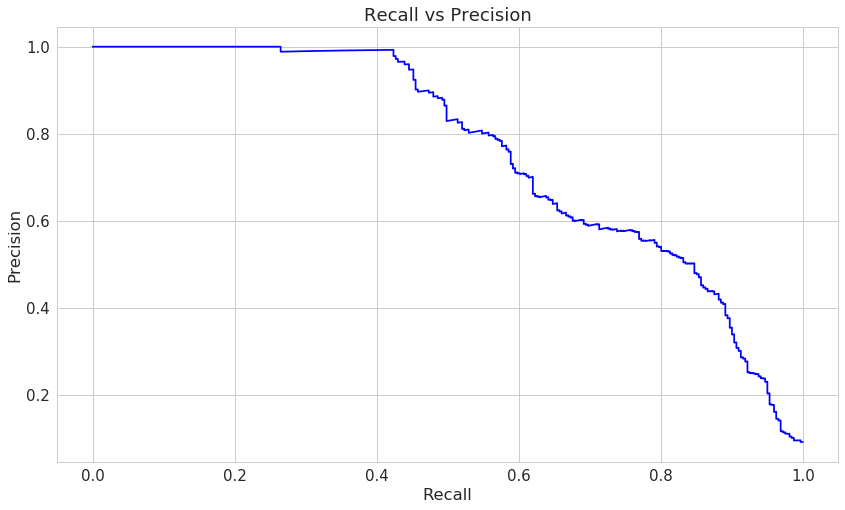

In [12]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

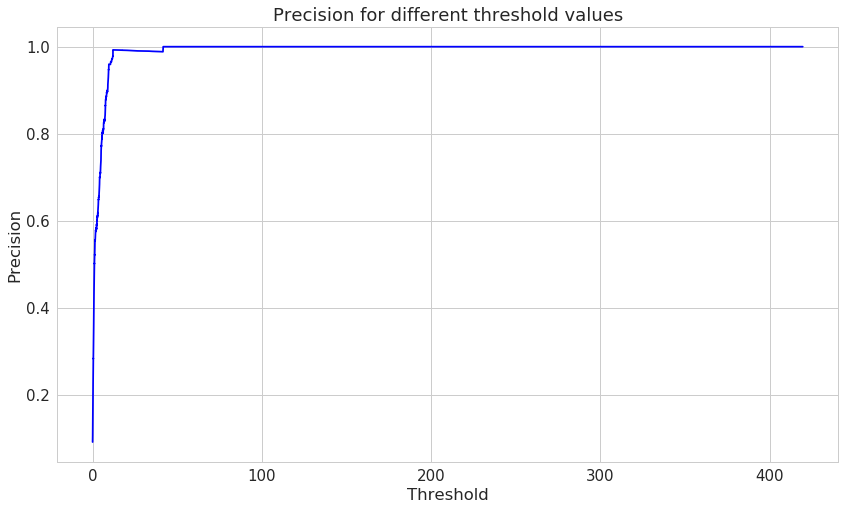

In [13]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

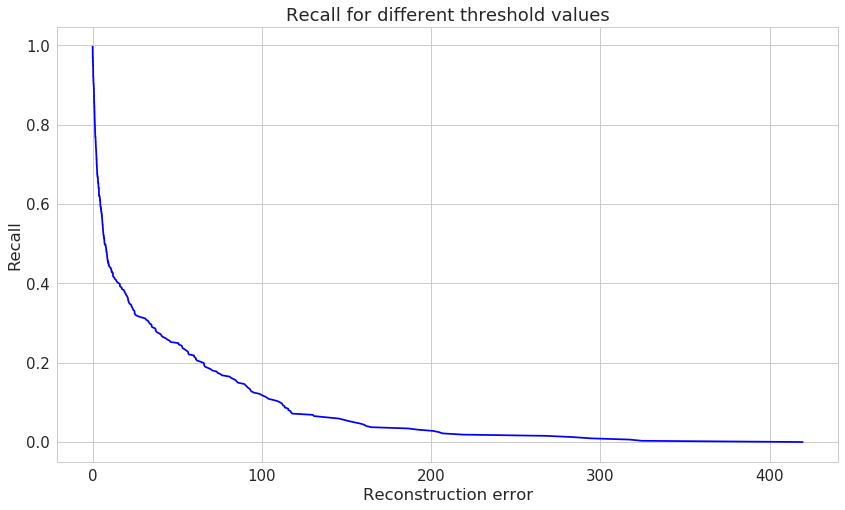

In [14]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

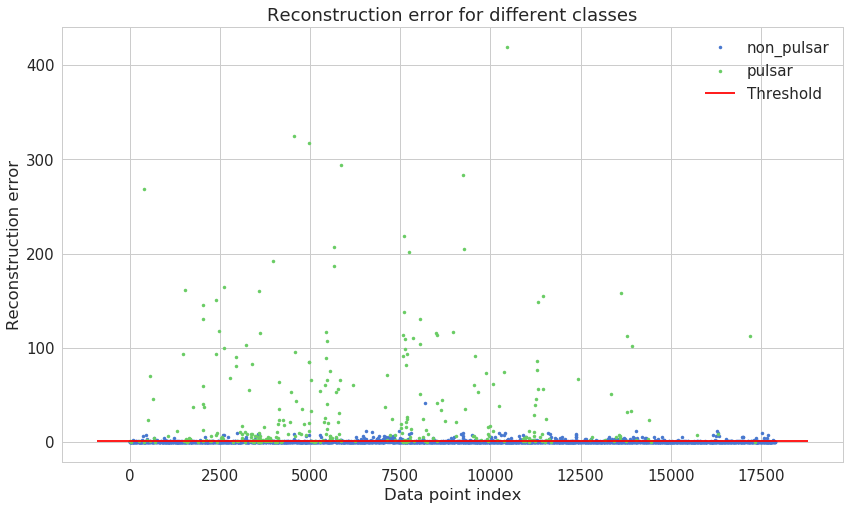

In [29]:
threshold = 1.4
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "pulsar" if name == 1 else "non_pulsar")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

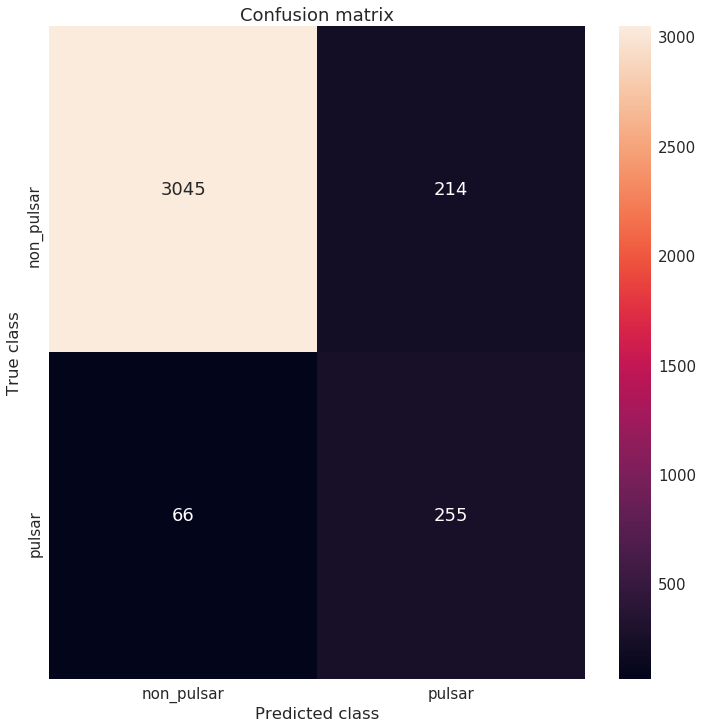

In [30]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline


sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["non_pulsar", "pulsar"]


Using TensorFlow backend.


In [2]:
data = pd.read_csv('pulsar_stars.csv')
df = data[[' Mean of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       'target_class']]

In [3]:
filt_df = df.loc[:, df.columns != 'target_class']

low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)

filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

filt_df = pd.concat([df.loc[:,'target_class'], filt_df], axis=1)

filt_df.dropna(inplace=True)
print(filt_df.head())

       Mean of the integrated profile  \
0.05                        57.491797   
0.95                       143.072656   

       Excess kurtosis of the integrated profile  \
0.05                                   -0.231671   
0.95                                    2.706561   

       Skewness of the integrated profile   Mean of the DM-SNR curve  \
0.05                            -0.556371                   1.005853   
0.95                            10.138507                  82.966973   

       Standard deviation of the DM-SNR curve  
0.05                                11.082345  
0.95                                74.621642  
   target_class   Mean of the integrated profile  \
1             0                       102.507812   
2             0                       103.015625   
4             0                        88.726562   
5             0                        93.570312   
7             0                       130.382812   

    Excess kurtosis of the integrated profile

In [4]:
from sklearn.preprocessing import StandardScaler

X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.target_class == 0]
X_train = X_train.drop(['target_class'], axis=1)

y_test = X_test['target_class']
X_test = X_test.drop(['target_class'], axis=1)

X_train = X_train.values
X_test = X_test.values
print(X_train[0])
print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[0])

[  1.08765625e+02   1.91285119e-01   7.94546100e-03   2.92140468e+00
   1.80095806e+01]
(13000, 5)
(3580, 5)
[-0.447012   -0.05752827 -0.36626491 -0.24201311 -0.31251915]


In [5]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [6]:
nb_epoch = 1000
batch_size = 320

autoencoder.compile(optimizer='sgd', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 13000 samples, validate on 3580 samples
Epoch 1/1000
13000/13000 [==============================] - 0s 10us/step - loss: 1.0359 - acc: 0.4379 - val_loss: 10.7688 - val_acc: 0.4830
Epoch 2/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.9495 - acc: 0.6074 - val_loss: 10.5965 - val_acc: 0.6274
Epoch 3/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.8925 - acc: 0.7104 - val_loss: 10.4352 - val_acc: 0.6774
Epoch 4/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.8450 - acc: 0.7428 - val_loss: 10.2795 - val_acc: 0.6969
Epoch 5/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.8036 - acc: 0.7551 - val_loss: 10.1339 - val_acc: 0.7366
Epoch 6/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.7685 - acc: 0.7588 - val_loss: 10.0047 - val_acc: 0.7503
Epoch 7/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.7398 - acc: 0.7671 - val_loss: 9.8

Epoch 118/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.4106 - acc: 0.8661 - val_loss: 7.5953 - val_acc: 0.8707
Epoch 119/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.4098 - acc: 0.8653 - val_loss: 7.5862 - val_acc: 0.8707
Epoch 120/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.4091 - acc: 0.8667 - val_loss: 7.5756 - val_acc: 0.8732
Epoch 121/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.4084 - acc: 0.8678 - val_loss: 7.5642 - val_acc: 0.8726
Epoch 122/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.4076 - acc: 0.8668 - val_loss: 7.5553 - val_acc: 0.8740
Epoch 123/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.4070 - acc: 0.8675 - val_loss: 7.5467 - val_acc: 0.8749
Epoch 124/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.4062 - acc: 0.8687 - val_loss: 7.5374 - val_acc: 0.8737
Epoch 125/1000
13000

13000/13000 [==============================] - 0s 7us/step - loss: 0.3604 - acc: 0.9029 - val_loss: 6.7081 - val_acc: 0.9128
Epoch 235/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3602 - acc: 0.9023 - val_loss: 6.7034 - val_acc: 0.9131
Epoch 236/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3600 - acc: 0.9038 - val_loss: 6.6968 - val_acc: 0.9117
Epoch 237/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3597 - acc: 0.9028 - val_loss: 6.6893 - val_acc: 0.9126
Epoch 238/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3595 - acc: 0.9030 - val_loss: 6.6786 - val_acc: 0.9131
Epoch 239/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3592 - acc: 0.9034 - val_loss: 6.6771 - val_acc: 0.9151
Epoch 240/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3590 - acc: 0.9035 - val_loss: 6.6721 - val_acc: 0.9137
Epoch 241/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 6us/step - loss: 0.3403 - acc: 0.9139 - val_loss: 6.1402 - val_acc: 0.9249
Epoch 351/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3402 - acc: 0.9138 - val_loss: 6.1346 - val_acc: 0.9232
Epoch 352/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3401 - acc: 0.9148 - val_loss: 6.1186 - val_acc: 0.9229
Epoch 353/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3399 - acc: 0.9138 - val_loss: 6.1238 - val_acc: 0.9237
Epoch 354/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3398 - acc: 0.9141 - val_loss: 6.1223 - val_acc: 0.9257
Epoch 355/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3397 - acc: 0.9147 - val_loss: 6.1136 - val_acc: 0.9251
Epoch 356/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3396 - acc: 0.9141 - val_loss: 6.1166 - val_acc: 0.9263
Epoch 357/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 7us/step - loss: 0.3288 - acc: 0.9188 - val_loss: 5.7134 - val_acc: 0.9249
Epoch 467/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.3287 - acc: 0.9194 - val_loss: 5.7001 - val_acc: 0.9246
Epoch 468/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3287 - acc: 0.9192 - val_loss: 5.7076 - val_acc: 0.9288
Epoch 469/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3286 - acc: 0.9174 - val_loss: 5.7076 - val_acc: 0.9288
Epoch 470/1000
13000/13000 [==============================] - 0s 4us/step - loss: 0.3286 - acc: 0.9177 - val_loss: 5.7007 - val_acc: 0.9282
Epoch 471/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3284 - acc: 0.9184 - val_loss: 5.7020 - val_acc: 0.9307
Epoch 472/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3284 - acc: 0.9182 - val_loss: 5.7055 - val_acc: 0.9293
Epoch 473/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 5us/step - loss: 0.3218 - acc: 0.9245 - val_loss: 5.3927 - val_acc: 0.9349
Epoch 583/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3217 - acc: 0.9254 - val_loss: 5.3815 - val_acc: 0.9302
Epoch 584/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3216 - acc: 0.9240 - val_loss: 5.3753 - val_acc: 0.9377
Epoch 585/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3216 - acc: 0.9250 - val_loss: 5.3698 - val_acc: 0.9372
Epoch 586/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3215 - acc: 0.9248 - val_loss: 5.3716 - val_acc: 0.9304
Epoch 587/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3216 - acc: 0.9238 - val_loss: 5.3605 - val_acc: 0.9363
Epoch 588/1000
13000/13000 [==============================] - 0s 4us/step - loss: 0.3215 - acc: 0.9251 - val_loss: 5.3612 - val_acc: 0.9335
Epoch 589/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 6us/step - loss: 0.3167 - acc: 0.9301 - val_loss: 5.1112 - val_acc: 0.9327
Epoch 699/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3168 - acc: 0.9273 - val_loss: 5.1097 - val_acc: 0.9397
Epoch 700/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3167 - acc: 0.9289 - val_loss: 5.1110 - val_acc: 0.9391
Epoch 701/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3169 - acc: 0.9272 - val_loss: 5.0956 - val_acc: 0.9399
Epoch 702/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3168 - acc: 0.9291 - val_loss: 5.1045 - val_acc: 0.9358
Epoch 703/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3169 - acc: 0.9279 - val_loss: 5.1078 - val_acc: 0.9399
Epoch 704/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3166 - acc: 0.9295 - val_loss: 5.0960 - val_acc: 0.9408
Epoch 705/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 6us/step - loss: 0.3148 - acc: 0.9285 - val_loss: 4.8635 - val_acc: 0.9447
Epoch 815/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3137 - acc: 0.9315 - val_loss: 4.8637 - val_acc: 0.9436
Epoch 816/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3129 - acc: 0.9300 - val_loss: 4.8882 - val_acc: 0.9436
Epoch 817/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3142 - acc: 0.9309 - val_loss: 4.8838 - val_acc: 0.9318
Epoch 818/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3145 - acc: 0.9292 - val_loss: 4.8777 - val_acc: 0.9439
Epoch 819/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3129 - acc: 0.9310 - val_loss: 4.8754 - val_acc: 0.9441
Epoch 820/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3128 - acc: 0.9330 - val_loss: 4.8811 - val_acc: 0.9480
Epoch 821/1000
13000/13000 [=======

13000/13000 [==============================] - 0s 5us/step - loss: 0.3157 - acc: 0.9269 - val_loss: 4.7075 - val_acc: 0.9480
Epoch 931/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3099 - acc: 0.9358 - val_loss: 4.7063 - val_acc: 0.9466
Epoch 932/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3115 - acc: 0.9313 - val_loss: 4.7251 - val_acc: 0.9383
Epoch 933/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3118 - acc: 0.9322 - val_loss: 4.7015 - val_acc: 0.9520
Epoch 934/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3104 - acc: 0.9350 - val_loss: 4.7073 - val_acc: 0.9422
Epoch 935/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.3099 - acc: 0.9338 - val_loss: 4.6793 - val_acc: 0.9447
Epoch 936/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3124 - acc: 0.9313 - val_loss: 4.7128 - val_acc: 0.9436
Epoch 937/1000
13000/13000 [=======

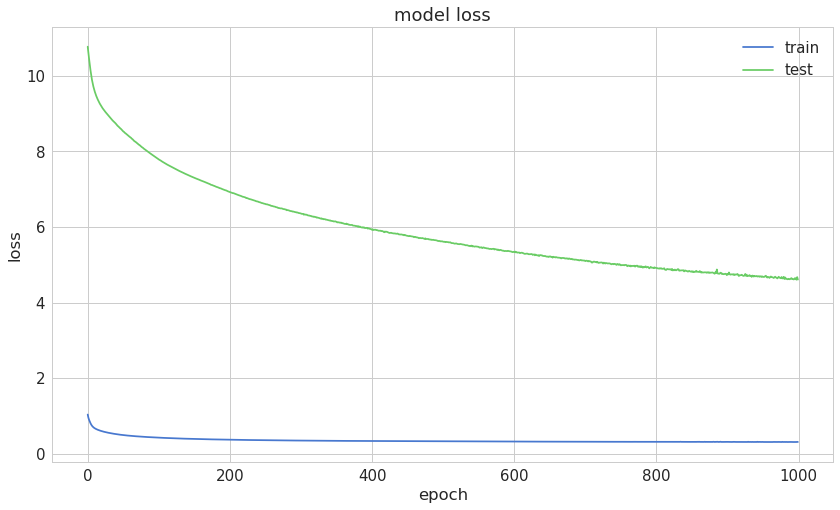

,reconstruction_error,true_class
count,3580.000000,3580.000000
mean,4.587000,0.089665
std,29.204461,0.285741
min,0.002694,0.000000
25%,0.116312,0.000000
50%,0.213535,0.000000
75%,0.412079,0.000000
max,615.237135,1.000000


In [7]:
autoencoder = load_model('model.h5')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

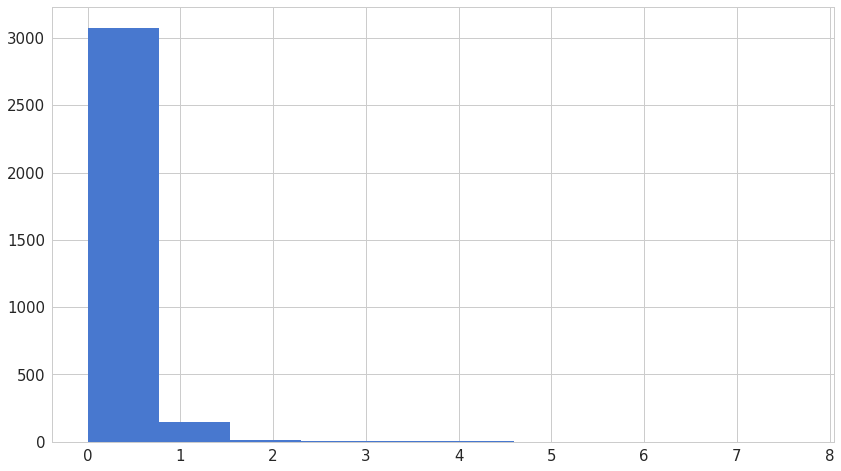

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)


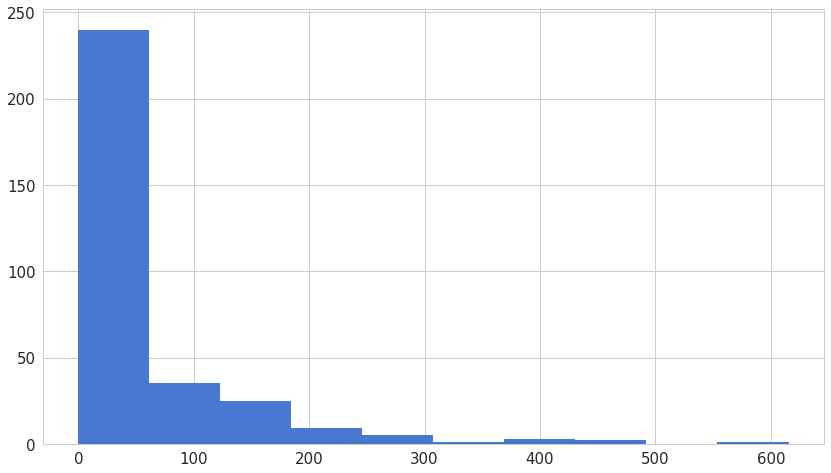

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [10]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

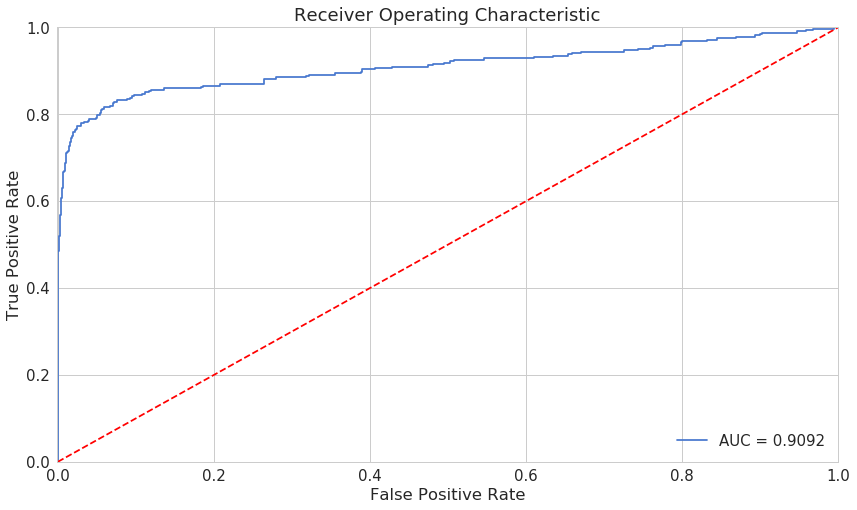

In [11]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

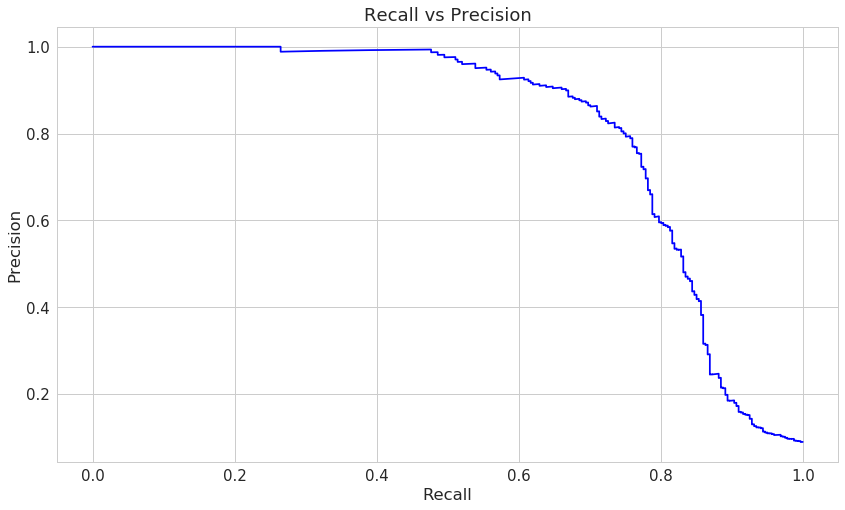

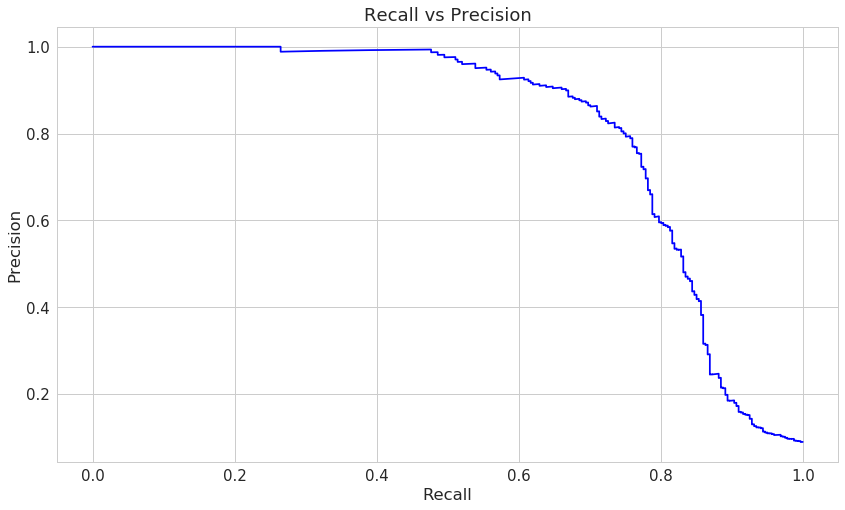

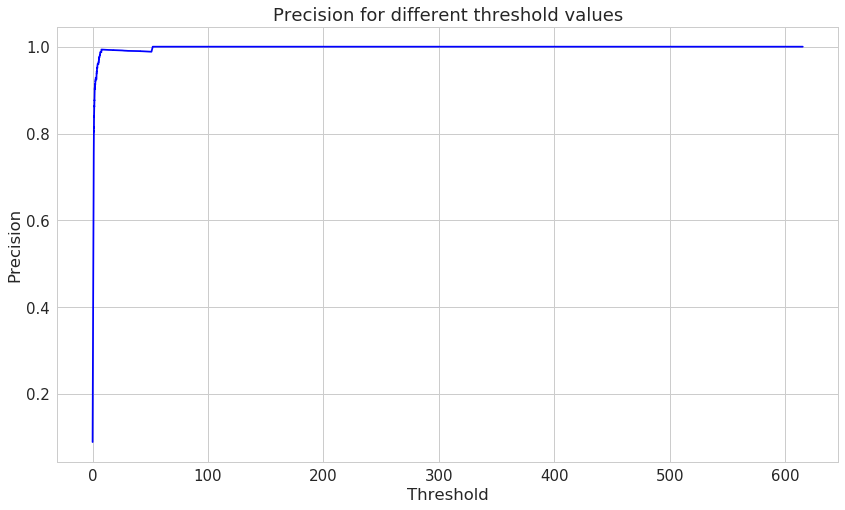

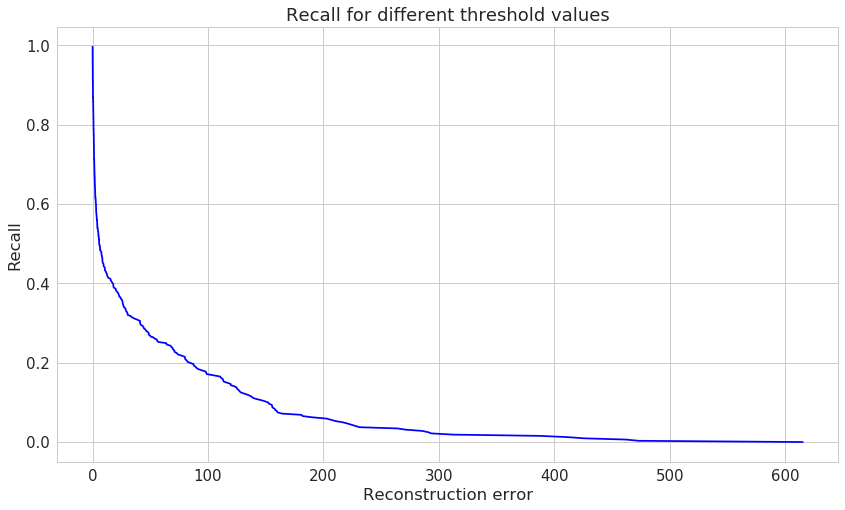

In [12]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

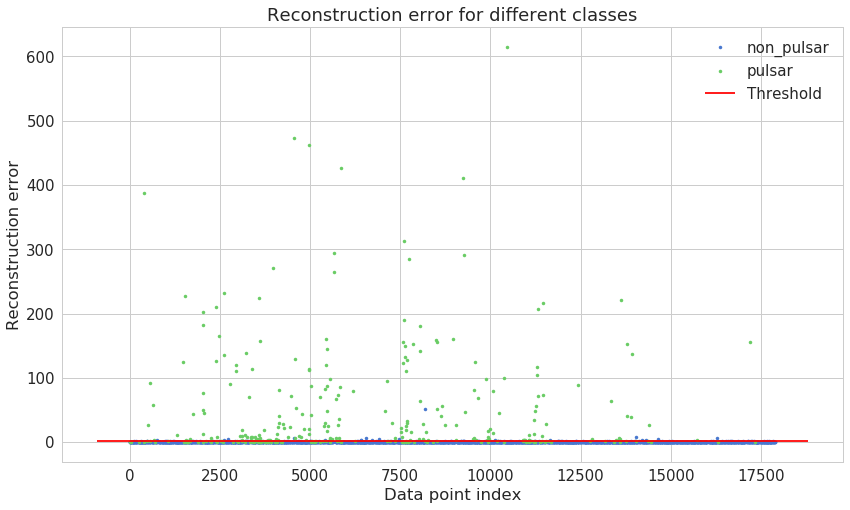

In [13]:
threshold = 1.4
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "pulsar" if name == 1 else "non_pulsar")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

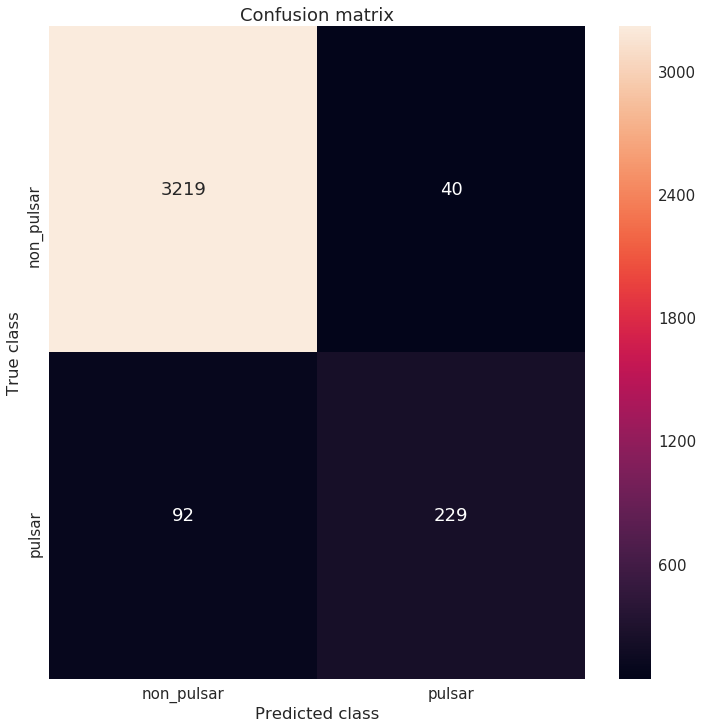

In [14]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()